# mass binning

In [1]:
from   astropy.io import fits
import numpy as np
from   astropy.table import Table
import matplotlib.pyplot as plt
from   scripts.tools    import *
from   scripts.hst3d      import *
from   scripts.jwst       import *
obj_lis = Table.read('obj_lis_selected.fits')

select = np.logical_and(np.logical_and(obj_lis['tag']!='agn',obj_lis['manual_select']=='keep'),obj_lis['mass']>0)
select = np.logical_and(obj_lis['manual_select']=='keep',obj_lis['mass']>0)
obj_lis_sel = obj_lis[select]

# Create mass bins with equal number of galaxies
sorted_masses = np.sort(np.log10(obj_lis_sel['mass'][~np.isnan(obj_lis_sel['mass'])]))
bins_m = [sorted_masses[0], sorted_masses[len(sorted_masses) // 3], sorted_masses[2 * len(sorted_masses) // 3], sorted_masses[-1]]

# Create labels for the mass bins
bin_label_m = [f'{bins_m[i]:.2f}<logm<{bins_m[i+1]:.2f}' for i in range(len(bins_m) - 1)]
binning_m = np.digitize(np.log10(obj_lis['mass']),bins_m)
bins_z  = [-np.inf,1.1,np.inf]
binning_z = np.digitize(obj_lis['z_MAP'],bins_z)
bin_label_m = [r'$8.9<logM/M_\odot<9.8$',r'$9.8<logM/M_\odot<10.35$',r'$10.35<logM/M_\odot<11.5$']
bin_label_z = ['0.7<z<1.1','1.1<z<1.5']

obj_lis['bin_m'] = binning_m
obj_lis['bin_z'] = binning_z
obj_lis.write('obj_lis_selected_bins.fits',overwrite=True)


def bin_center(r_lis):
    diff = np.diff(r_lis)  # Calculate differences between consecutive elements
    diff = diff[diff > 0]  # Keep only positive differences
    return r_lis + np.mean(diff) / 2  # Return r_lis plus half the mean of the differences

print(len(obj_lis))

binning_m_sel = binning_m[select]
binning_z_sel = binning_z[select]
std_lis = [np.log10(np.median(obj_lis_sel['mass'][binning_m_sel==i])) for i in range(1,4)]
std_lis_var = [np.std(np.log10(obj_lis_sel['mass'][binning_m_sel==i])) for i in range(1,4)]
print([f'{std_lis[i]:.2f}+-{std_lis_var[i]:.2f}' for i in range(3)])


#check the properties for mass and 
std_lis = [np.median(obj_lis_sel['z_MAP'][binning_z_sel==i]) for i in range(1,4)]
std_lis_var = [np.std(obj_lis_sel['z_MAP'][binning_z_sel==i]) for i in range(1,4)]
print([f'{std_lis[i]:.2f}+-{std_lis_var[i]:.2f}' for i in range(3)])

158
['9.57+-0.24', '10.13+-0.13', '10.74+-0.25']
['0.98+-0.09', '1.24+-0.10', 'nan+-nan']


/var/folders/6h/pm731bh5769gqlt1mrys7wth0000gn/T/ipykernel_36141/1015863004.py:20: RuntimeWarning: invalid value encountered in log10
  binning_m = np.digitize(np.log10(obj_lis['mass']),bins_m)
/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/numpy/cor

In [20]:
print(np.min(obj_lis_sel['z_MAP']),np.max(obj_lis_sel['z_MAP']))
print(np.log10(np.min(obj_lis_sel['mass'])),np.log10(np.max(obj_lis_sel['mass'])))

0.7365642077970592 1.541515650019972
8.962271844569623 11.504594357928584


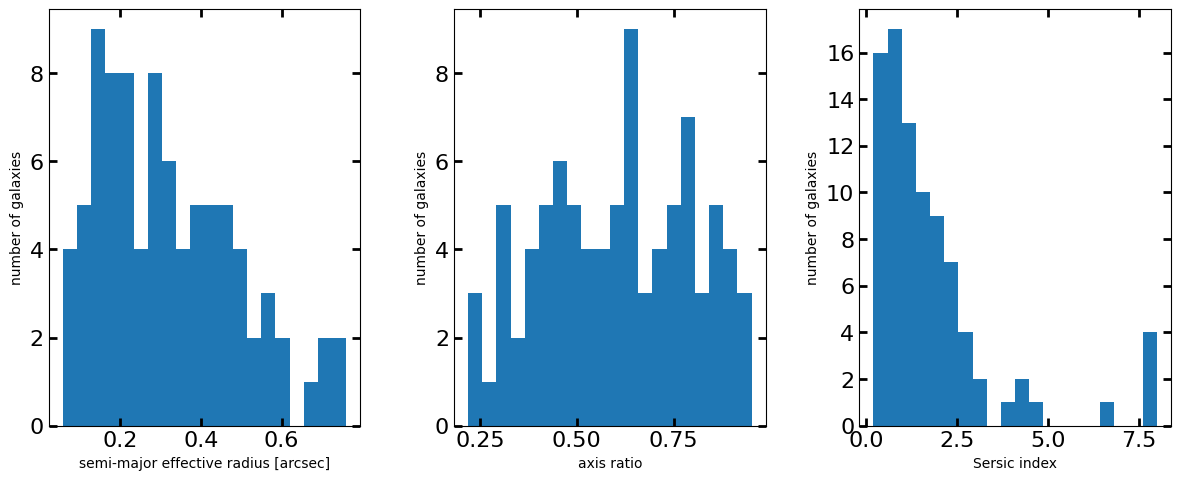

array([<Axes: xlabel='semi-major effective radius [arcsec]', ylabel='number of galaxies'>,
       <Axes: xlabel='axis ratio', ylabel='number of galaxies'>,
       <Axes: xlabel='Sersic index', ylabel='number of galaxies'>],
      dtype=object)

<Figure size 640x480 with 0 Axes>

In [2]:
3*np.median(obj_lis['re'])/0.1* np.median(obj_lis_sel['pixel_length'])

fig, ax = plt.subplots(1, 3, figsize=(12, 5))
#make general fonts bigger
plt.rcParams.update({'font.size': 13})
#hist effective radius ['re']
ax[0].hist(np.array(obj_lis_sel['re']), bins=20)
ax[0].set_xlabel('semi-major effective radius [arcsec]')
ax[0].set_ylabel('number of galaxies')
ax[0].tick_params(direction='in', which='both', top=True, right=True, width=2, length=6,labelsize=16)  # Set tick width and length

#hist axis ratio ['q']
ax[1].hist(np.array(obj_lis_sel['q']), bins=20)
ax[1].set_xlabel('axis ratio')
ax[1].set_ylabel('number of galaxies')
ax[1].tick_params(direction='in', which='both', top=True, right=True, width=2, length=6,labelsize=16)  # Set tick width and length

ax[2].hist(np.array(obj_lis_sel['n']), bins=20)
ax[2].set_xlabel('Sersic index')
ax[2].set_ylabel('number of galaxies')
ax[2].tick_params(direction='in', which='both', top=True, right=True, width=2, length=6,labelsize=16)  # Set tick width and length

plt.tight_layout()
plt.show()
plt.savefig('morph.jpg',)

ax


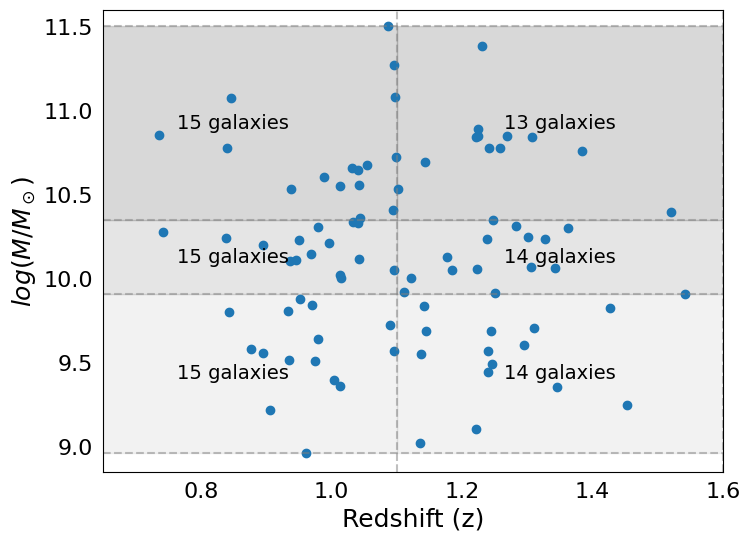

In [3]:
# Define the bin edges for mass and redshift
mass_bins = bins_m
redshift_bins = [0.6, 1.1, 1.6]

fit = plt.figure(figsize=(8, 6))
# Plot the data points
plt.plot(obj_lis_sel['z_MAP'], np.log10(obj_lis_sel['mass']), 'o')

# Add vertical lines for redshift bins
for z in redshift_bins:
    plt.axvline(z, color='grey', linestyle='--', alpha=0.5)

# Add horizontal lines for mass bins
for m in mass_bins:
    plt.axhline(m, color='grey', linestyle='--', alpha=0.5)

# Add shaded regions for each bin and annotate the number of data points
for i in range(len(redshift_bins) - 1):
    for j in range(len(mass_bins) - 1):
        bin_mask = (obj_lis_sel['z_MAP'] >= redshift_bins[i]) & (obj_lis_sel['z_MAP'] < redshift_bins[i + 1]) & (np.log10(obj_lis_sel['mass']) >= mass_bins[j]) & (np.log10(obj_lis_sel['mass']) < mass_bins[j + 1])
        num_points = np.sum(bin_mask)
        plt.fill_betweenx([mass_bins[j], mass_bins[j + 1]], redshift_bins[i], redshift_bins[i + 1], color='grey', alpha=0.1 * (j + 1))
        plt.text((redshift_bins[i] + redshift_bins[i + 1]) / 2, (mass_bins[j] + mass_bins[j + 1]) / 2, f'{num_points} galaxies', color='black', ha='center', va='center', fontsize=14)
#display no tick lines in the plot
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=True, labelleft=True)
#make x,y axis lablel big
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(8.85, 11.6)
plt.xlim(0.65, 1.6)
plt.xlabel('Redshift (z)', fontsize=18)
plt.ylabel(r'$log(M/M_\odot)$', fontsize=18)
#plt.savefig('image_outputs/mass_redshift_bins.png')
plt.show()



plot surface profile in mass binning

In [29]:
import os
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from matplotlib import colors
from matplotlib.pyplot import cm
from matplotlib import use
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
from matplotlib.patches import Ellipse
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
from scripts.tools import *


def plot_balmer_decrem(obj, plot, plot_var, crop_size=50):
    try:
        # Construct the path to the FITS file
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"
        
        # Open the FITS file
        with fits.open(path) as hdu:
            # Determine the center of the image
            shape = hdu[3].data.shape[0]
            si = (shape - crop_size) // 2; 
            ei = si + crop_size

            #extract segmentation map
            if find_data('SEG_MOD',hdu) != None:
                seg = find_data('SEG_MOD',hdu)[1].data
            else:
                seg = find_data('SEG',hdu)[1].data

            #effective radius (in arcsec)
            r_eff = obj['re']
             
            # Create a figure with subplots
            fig, axes = plt.subplots(2, 4, figsize=(17, 9))
            axes = axes.flatten()

            # Loop through the specified image names and plot them
            #here i try to add segmentation map effect to the image
            for i, name in enumerate(['DSCI', 'LINE_HA', 'LINE_HB_CONV', '2D_BALMER']):
                image = find_data(name, hdu)[1]
                titles = {
                        "DSCI": find_data('DSCI',hdu)[1].header['EXTTYPE'],
                        "LINE_HA": r"H$\alpha$",
                        "LINE_HB_CONV": r"H$\beta$",
                        "2D_BALMER": r'$H\alpha / H\beta$'
                        }
                data = image.data[si:ei, si:ei]
                # Extract the segmentation map for the same region
                seg_crop = seg[si:ei, si:ei]
                # Create a mask where the segmentation map matches the object ID
                mask = seg_crop == obj['ID']
                
                ax = axes[i]
                ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)

                # Plot the original data with plasma_r colormap
                norm = colors.LogNorm()#vmin=np.nanmin(data),vmax = np.nanmax(data))
                norm = colors.Normalize(vmin=0)
                if name == '2D_BALMER':
                    norm = colors.Normalize(vmin=0, vmax=10)
                im = ax.imshow(np.where(mask, data, np.nan), norm=norm, origin='lower', cmap='plasma_r')
                
                # Convert the colormap to grayscale
                cmap = cm.plasma_r
                cmap_colors = cmap(np.arange(cmap.N))
                hsv_colors = rgb_to_hsv(cmap_colors[:, :3])
                hsv_colors[:, 1] = 0  # Set saturation to 0 to convert to grayscale
                gray_cmap = colors.ListedColormap(hsv_to_rgb(hsv_colors))

                # Overlay the segmentation map with gray colormap and lower transparency
                ax.imshow(np.where(np.logical_not(mask), data, np.nan), norm=norm, origin='lower', cmap=gray_cmap, alpha=0.5)
                
                if obj['f'] == 0:
                # Plot a circle representing the effective radius
                    ellipse = Ellipse((crop_size/2-1, crop_size/2-1), 
                                    width=2*r_eff/0.1,
                                    height=2*obj['q']*r_eff/0.1, angle=-obj['pa'],
                                    color='cyan', fill=False, linestyle='--', label=r'$r_e$', linewidth=2)
                    ax.add_patch(ellipse)
                else:
                    circ = plt.Circle((crop_size/2-1, crop_size/2-1), r_eff/0.1, color='cyan', fill=False, linestyle='--', label=r'$r_e$', linewidth=2)
                    ax.add_patch(circ)

                ax.plot([3, 7], [4, 4])
                ax.text(5, 5, f"{round(obj['pixel_length'] * 4, 2)} kpc", fontsize=17)
                ax.text(0.05, 0.95, f'{titles[name]}', transform=ax.transAxes, fontsize=18, verticalalignment='top')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                if name == 'DSCI':
                    ax.legend(fontsize=19,loc= 'upper right')

            # Extract and plot the radial profiles
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_BV, A_Ha = np.vstack(find_data(plot, hdu)[1].data).transpose()
            r_var, ha_r_var, ha_r_err_var, hb_r_var, hb_r_err_var, balmer_r_var, balmer_r_err_var, E_BV_var, A_Ha_var = np.vstack(find_data(plot_var, hdu)[1].data).transpose()

            if True:
                # Plot the Ha radial profiles
                ax = axes[4]
                ax.errorbar(r, ha_r, yerr=ha_r_err, fmt='ro:', label=r'H$\alpha$, circular', alpha=0.5)
                #ax.errorbar(r_var, ha_r_var, yerr=ha_r_err_var, fmt='go:', label=r'H$\alpha$, elliptical', alpha=0.5)

                #effective radius
                ax.axvspan(0, r_eff * obj['pixel_length'] / 0.1, color='grey', alpha=0.3)
                
                # Determine the plot limits
                arr = np.append(ha_r, ha_r_var)
                arr = arr[arr > 0]
                plot_min = np.nanmin(arr) * 0.05
                plot_max = np.nanmax(arr) * 100

                # Annotate the effective radius
                ax.annotate(
                    "",  # Only draw the arrow, no text
                    xy=(0, plot_min * 2),  # Right endpoint
                    xytext=(r_eff * obj['pixel_length'] / 0.1, plot_min * 2),  # Left endpoint
                    arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"),  # Horizontal double arrow
                )
                ax.text(r_eff * obj['pixel_length'] / 0.1 / 2, plot_min * 2.1, 
                        r"$r_{eff}$", fontsize=14, color="black", ha="center", va='bottom')
                ax.set_xlabel('Distance [kpc]', fontsize=16)
                ax.set_ylabel('flux [$10^{-17}$ erg/s/cm$^2$$]', fontsize=17)
                ax.set_ylim(plot_min, plot_max)
                ax.set_xlim(0, 3*obj['re']/0.1*obj['pixel_length'])

                ax.set_yscale('log')
                ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)
                ax.legend(fontsize=14)

            if True:
                # Plot the Hb radial profiles
                ax = axes[5]
                ax.errorbar(r, hb_r, yerr=hb_r_err, fmt='ro:', label=r'H$\beta$, circular', alpha=0.5)
                #ax.errorbar(r_var, hb_r_var, yerr=hb_r_err_var, fmt='go:', label=r'H$\beta$, elliptical', alpha=0.5)

                #effective radius
                ax.axvspan(0, r_eff * obj['pixel_length'] / 0.1, color='grey', alpha=0.3)
                
                # Determine the plot limits
                #arr = np.append(hb_r, hb_r_var)
                arr = arr[arr > 0]
                plot_min = np.nanmin(arr) * 0.05
                plot_max = np.nanmax(arr) * 100

                # Annotate the effective radius
                ax.annotate(
                    "",  # Only draw the arrow, no text
                    xy=(0, plot_min * 2),  # Right endpoint
                    xytext=(r_eff * obj['pixel_length'] / 0.1, plot_min * 2),  # Left endpoint
                    arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"),  # Horizontal double arrow
                )
                ax.text(r_eff * obj['pixel_length'] / 0.1 / 2, plot_min * 2.1, 
                        r"$r_{eff}$", fontsize=14, color="black", ha="center", va='bottom')
                ax.set_xlabel('Distance [kpc]', fontsize=16)
                ax.set_ylabel('flux [$10^{-17}$ erg/s/cm$^2$$]', fontsize=17)
                ax.set_ylim(plot_min, plot_max)
                ax.set_xlim(0, 3*obj['re']/0.1*obj['pixel_length'])

                ax.set_yscale('log')
                ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)
                ax.legend(fontsize=14)

            if True:
                # Plot the Balmer decrement radial profile
                ax = axes[6]
                mask = np.logical_and(np.logical_not(np.isnan(balmer_r)), balmer_r > 0)
                #mask_var = np.logical_and(np.logical_not(np.isnan(balmer_r_var)), balmer_r_var > 0)
                l1 = ax.errorbar(r[mask], balmer_r[mask], yerr=balmer_r_err[mask], color='grey', fmt='o:', label=r'$H\alpha / H\beta$, Elliptical', alpha=0.5)
                #l1_var = ax.errorbar(r_var[mask_var], balmer_r_var[mask_var], yerr=balmer_r_err_var[mask_var], color='black', fmt='o:', label=r'$H\alpha / H\beta$, elliptical+PACK', alpha=0.5)

                ax.set_xlabel('Distance [kpc]', fontsize=16)
                ax.set_ylabel(r'$H\alpha / H\beta$', fontsize=17)
                ax.set_ylim(-5, 25)
                ax.set_xlim(0, 3*obj['re']/0.1*obj['pixel_length'])

                # Annotate the effective radius
                plot_min = -4.5
                #effective radius
                ax.axvspan(0, r_eff * obj['pixel_length'] / 0.1, color='grey', alpha=0.3)
                ax.annotate(
                    "",  # Only draw the arrow, no text
                    xy=(0, plot_min),  # Right endpoint
                    xytext=(r_eff * obj['pixel_length'] / 0.1, plot_min),  # Left endpoint
                    arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"),  # Horizontal double arrow
                )
                ax.text(r_eff * obj['pixel_length'] / 0.1 / 2, plot_min, 
                        r"$r_{eff}$", fontsize=14, color="black", ha="center", va='bottom')

                ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)
                ax.legend(fontsize=14)

            if True:
                # Plot the A_Ha radial profile
                ax = axes[7]
                mask = np.logical_not(np.isnan(A_Ha))
                #mask_var = np.logical_and(np.logical_not(np.isnan(A_Ha_var)), A_Ha_var > 0)
                l2 = ax.errorbar(r[mask], A_Ha[mask], yerr=balmer_r_err[mask], color='darkblue', linestyle='-', fmt='o', label=r'Attenuation H$\alpha$, elliptical', alpha=0.5)
                #l2_var = ax.errorbar(r_var[mask_var], A_Ha_var[mask_var], yerr=balmer_r_err_var[mask_var], color='blue', linestyle='-', fmt='o', label=r'Attenuation H$\alpha$, elliptical+PACK', alpha=0.5)

                ax.set_xlabel('Distance [kpc]', fontsize=16)
                ax.set_ylabel(r'$A_{H\alpha}$', fontsize=17)
                ax.set_ylim(-5, 10)
                ax.set_xlim(0, 3*obj['re']/0.1*obj['pixel_length'])

                # Annotate the effective radius
                plot_min = -4.5
                #effective radius
                ax.axvspan(0, r_eff * obj['pixel_length'] / 0.1, color='grey', alpha=0.3)
                ax.annotate(
                    "",  # Only draw the arrow, no text
                    xy=(0, plot_min),  # Right endpoint
                    xytext=(r_eff * obj['pixel_length'] / 0.1, plot_min),  # Left endpoint
                    arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"),  # Horizontal double arrow
                )
                ax.text(r_eff * obj['pixel_length'] / 0.1 / 2, plot_min, 
                        r"$r_{eff}$", fontsize=14, color="black", ha="center", va='bottom')

                ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)
                ax.legend(fontsize=14)

            # Add a big title for the entire figure
            fig.suptitle(f"{obj['subfield']}- {obj['ID']}, Mass: {round(np.log10(obj['mass']), 2)}[log$M_\odot$], Redshift: {round(obj['z_MAP'], 2)}, axis ratio q: {np.round(obj['q'],2)}, sersic index n:{np.round(obj['n'],2)} ", fontsize=20)

            # Save the plot
            save_path = f"radial_balmer_decrem/{plot}_vs_{plot_var}"
            save_path_sn_10 = f"sn_10/radial_balmer_decrem/{plot}_vs_{plot_var}"
            os.makedirs(save_path, exist_ok=True)
            os.makedirs(save_path_sn_10, exist_ok=True)
            os.makedirs(f"{save_path}/selected", exist_ok=True)
            os.makedirs(f"{save_path}/1", exist_ok=True)
            os.makedirs(f"{save_path}/2", exist_ok=True)
            os.makedirs(f"{save_path}/3", exist_ok=True)
            
            plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the big title

            if obj['sn_hb'] > 10:
                plt.savefig(f"{save_path_sn_10}/{obj['subfield']}-{obj['ID']}_{obj['tag']}_{obj['manual_select']}.png", dpi=300)
            if obj['manual_select'] == 'keep':
                plt.savefig(f"{save_path}/{obj['subfield']}-{obj['ID']}_{obj['tag']}_{obj['manual_select']}.png")
                plt.savefig(f"{save_path}/{int(obj['bin_m'])}/{obj['subfield']}-{obj['ID']}_{obj['tag']}_{obj['manual_select']}.png")
            else:
                plt.savefig(f"{save_path}/selected/{obj['subfield']}-{obj['ID']}_{obj['tag']}_{obj['manual_select']}.png")

            plt.close('all')

            return f"{obj['subfield']}-{obj['ID']} saved"
    except Exception as e:
            print(f"! {obj['subfield']}-{obj['ID']} failed, error{e}")
            return f"! {obj['subfield']}-{obj['ID']} failed, error{e}"


def cat_process(obj_lis, plot='RA D_PROFILE', plot_var='RAD_PROFILE_BG', max_threads=1):
    print(f'\n start plot process{plot,plot_var}')
    results = []
    if max_threads > 1:
        # Use multithreading to process the objects in parallel
        with ThreadPoolExecutor(max_threads) as executor:
            futures = {executor.submit(plot_balmer_decrem, obj, plot=plot, plot_var=plot_var): obj for obj in obj_lis}
            for future in tqdm(as_completed(futures), total=len(obj_lis), desc="Processing"):
                results.append(future.result())
        return results
    else:
        # Process the objects sequentially
        for obj in tqdm(obj_lis):
            results.append(plot_balmer_decrem(obj, plot, plot_var))
        return results

def main():
    plot='RAD_PROFILE_CONV'
    plot_var='RAD_PROFILE_ELLIP__CONV_PACK'
    os.makedirs(f"radial_balmer_decrem/{plot}_vs_{plot_var}/1", exist_ok=True)
    os.makedirs(f"radial_balmer_decrem/{plot}_vs_{plot_var}/2", exist_ok=True)
    os.makedirs(f"radial_balmer_decrem/{plot}_vs_{plot_var}/3", exist_ok=True)

    use('Agg')  # Use the 'Agg' backend for matplotlib    
    # Process the objects and plot the results
    results1 = cat_process(obj_lis, plot=plot, plot_var=plot_var, max_threads=1)
    errorcounting(results1)
    print(results1)

if __name__ == '__main__':
    main()


/var/folders/6h/pm731bh5769gqlt1mrys7wth0000gn/T/ipykernel_36141/259401596.py:281: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  use('Agg')  # Use the 'Agg' backend for matplotlib



 start plot process('RAD_PROFILE_CONV', 'RAD_PROFILE_ELLIP__CONV_PACK')


  9%|▉         | 14/158 [00:11<01:53,  1.26it/s]/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3749: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
 18%|█▊        | 29/158 [00:23<01:54,  1.13it/s]

! GN4-19075 failed, errorzero-size array to reduction operation fmin which has no identity


 23%|██▎       | 36/158 [00:29<01:52,  1.09it/s]/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3749: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
 28%|██▊       | 44/158 [00:36<02:05,  1.10s/it]/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3749: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
 49%|████▊     | 77/158 [01:01<01:04,  1.25it/s]/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3749: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
 78%|███████▊  | 123/158 [01:37<00:24,  1.41it/s]/opt/anaconda3/envs/baproj/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3749: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
 98%|██

! GS1-48793 failed, error[Errno 2] No such file or directory: 'radial_balmer_decrem/RAD_PROFILE_CONV_vs_RAD_PROFILE_ELLIP__CONV_PACK/4/GS1-48793_agn_keep.png'


100%|██████████| 158/158 [02:09<00:00,  1.22it/s]

total number of obj processed: 158
number of failed obj 2
['GN2-10512 saved', 'GN2-11228 saved', 'GN7-11839 saved', 'GN7-11883 saved', 'GN7-12769 saved', 'GN7-13197 saved', 'GN7-13686 saved', 'GN7-13777 saved', 'GN7-13909 saved', 'GN7-14184 saved', 'GN7-14281 saved', 'GN7-14716 saved', 'GN7-14850 saved', 'GN2-14895 saved', 'GN7-15127 saved', 'GN7-15204 saved', 'GN7-15300 saved', 'GN7-15761 saved', 'GN7-16041 saved', 'GN2-16173 saved', 'GN2-16752 saved', 'GN7-17532 saved', 'GN2-17579 saved', 'GN2-17829 saved', 'GN7-17927 saved', 'GN2-18197 saved', 'GN2-18224 saved', 'GN2-18315 saved', 'GN7-19005 saved', '! GN4-19075 failed, errorzero-size array to reduction operation fmin which has no identity', 'GN7-19235 saved', 'GN7-19258 saved', 'GN7-19504 saved', 'GN7-19659 saved', 'GN2-21552 saved', 'GN4-21690 saved', 'GN2-21720 saved', 'GN4-22547 saved', 'GN4-22815 saved', 'GN4-23082 saved', 'GN7-23580 saved', 'GN4-23756 saved', 'GN4-24377 saved', 'GN4-24582 saved', 'GN4-26015 saved', 'GN4-27282 

(array([62.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

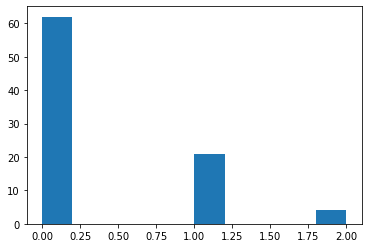

In [4]:
plt.hist(obj_lis_sel['f'])

/var/folders/6h/pm731bh5769gqlt1mrys7wth0000gn/T/ipykernel_16823/867698548.py:3: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(obj_lis['mass']),bins = [9,9.75,10.5,11.25],alpha=0.5)


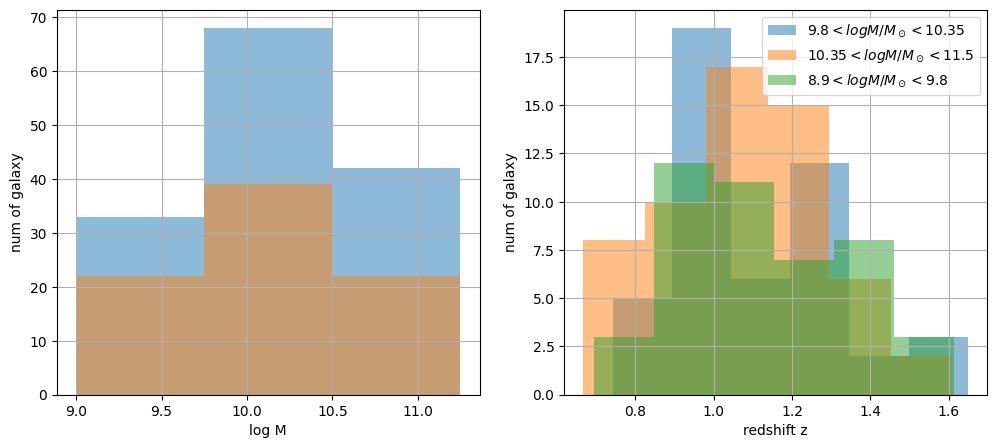

In [4]:
ax = plt.figure(figsize=(12,5))
ax.add_subplot(121)
plt.hist(np.log10(obj_lis['mass']),bins = [9,9.75,10.5,11.25],alpha=0.5)
plt.hist(np.log10(obj_lis_sel['mass']),bins = [9,9.75,10.5,11.25],alpha=0.5)
plt.xlabel('log M');plt.ylabel('num of galaxy')
plt.grid()

ax.add_subplot(122)
plt.hist(obj_lis[binning_m==2]['z_MAP'],bins=6,alpha=0.5,label=bin_label_m[1])
plt.hist(obj_lis[binning_m==3]['z_MAP'],bins=6,alpha=0.5,label=bin_label_m[2])
plt.hist(obj_lis[binning_m==1]['z_MAP'],bins=6,alpha=0.5,label=bin_label_m[0])

plt.xlabel('redshift z');plt.ylabel('num of galaxy')
plt.legend();plt.grid()
plt.show()


# radial profiles, in [kpc] radius

method 1 ha hb balmer data all from surface brightness measurement then taking the median

(2.6883912979950493, 1.4262995931315914)

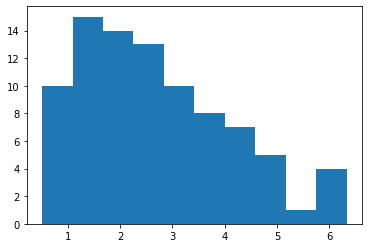

In [6]:
re_kpc = obj_lis_sel['re']/0.1*obj_lis_sel['pixel_length']
plt.hist(re_kpc,bins=10)
np.mean(re_kpc),np.std(re_kpc)

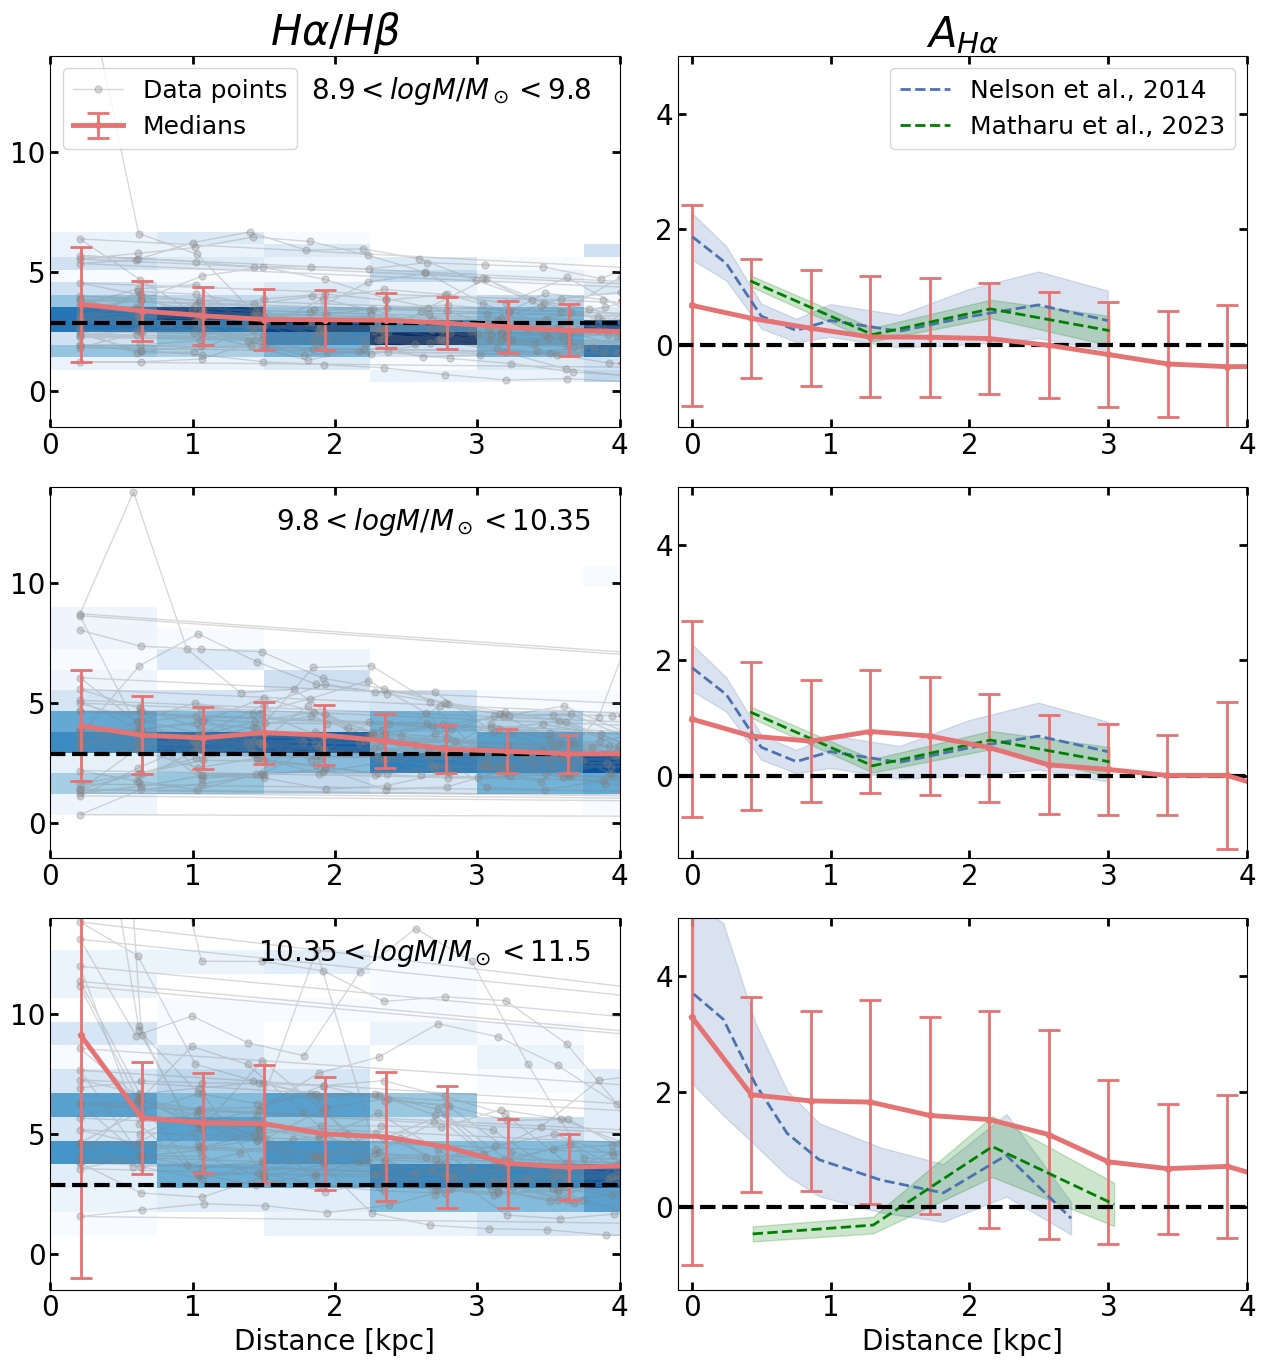

In [5]:
# ============================== Part 1: Data Preparation and Plotting ==============================
obj_lis_sel = obj_lis[select]
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(13, 14))  # 调整为适合3x2布局的尺寸

# --------------------------- 初始化存储列表 ---------------------------
binned_radius = []
median_balmer = []
median_balmer_err = []

# ============================== 主处理循环 ==============================
for i in range(len(bins_m) - 1):
    # ===================== 左列：原始数据分布图 =====================
    ax_left = fig.add_subplot(3, 2, i*2+1)  # 左列位置：1,3,5
    ax_left.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6, labelsize=20)  # Set tick width, length, and label size

    # ----------------- 数据加载与预处理 -----------------
    r_lis = np.array([])
    balmer_lis = np.array([])
    balmer_err_lis = np.array([])

    for obj in obj_lis_sel[binning_m_sel == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"
        with fits.open(path) as hdu:
            data = find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(data).transpose()
            
            r_lis = np.append(r_lis, r)
            balmer_lis = np.append(balmer_lis, balmer_r)
            balmer_err_lis = np.append(balmer_err_lis, balmer_r_err)

    # ----------------- 可视化部分 -----------------
    r_bins_center = bin_center(r_lis)
    mask = np.logical_and(r_lis < 6, balmer_lis < 1e100)
    mask_for_plot = np.logical_and(r_lis < 6, balmer_lis < 13)

    # 2D直方图
    hist = ax_left.hist2d(r_lis[mask_for_plot], balmer_lis[mask_for_plot], 
                         bins=(8, 12), cmap='Blues', cmin=1)
    #plt.colorbar(hist[3], ax=ax_left)
    
    # 原始数据点
    ax_left.plot(r_bins_center, balmer_lis, 
                linewidth=1, marker='o', markersize=5, 
                color='grey', alpha=0.3, label='Data points')
    
    # 分箱中值计算
    bin_edges = np.linspace(np.min(r_lis[mask]), np.max(r_lis[mask]), num=15)
    bin_indices = np.digitize(r_lis[mask], bin_edges)
    median_values = [np.mean(balmer_lis[mask][bin_indices == j]) 
                    for j in range(1, len(bin_edges))]
    std_values = [np.std(balmer_lis[mask][bin_indices == j]) 
                 for j in range(1, len(bin_edges))]
    std_r_values = [np.std(r_lis[mask][bin_indices==j]) 
                  for j in range(1,len(bin_edges))]

    # 中值误差棒
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax_left.errorbar(bin_centers, median_values, yerr=std_values,# xerr=std_r_values,
                    fmt='-', color="#E57373", alpha=1, linewidth=3.5,
                    marker='o', markersize=4, label='Medians', elinewidth=2,capsize=8,capthick=2)

    # 公共元素
    ax_left.axhline(2.86, 0, 7, linestyle='--', color='black',linewidth=3)
    ax_left.set_xlim(0,4)
    ax_left.set_ylim(-1.5,14)
    if i==2:
        ax_left.set_xlabel('Distance [kpc]',fontsize=20)
    ax_left.text(0.95, 0.95, [r'$8.9<logM/M_\odot<9.8$',r'$9.8<logM/M_\odot<10.35$',r'$10.35<logM/M_\odot<11.5$'][i], transform=ax_left.transAxes, fontsize=20, verticalalignment='top', horizontalalignment='right')
    
    if i == 0:
        ax_left.set_title(r'$H\alpha/H\beta$', fontsize=30)
        ax_left.legend(loc='upper left',fontsize=18)

    # ===================== 存储中间结果 =====================
    binned_radius.append(bin_edges[:-1])
    median_balmer.append(median_values)
    median_balmer_err.append(std_values)

def K_lambda(line='Ha'):
    """
    Calculate the dust attenuation value k(lambda) from the Calzetti et al. (2000) attenuation curve
    for either H-alpha (656.3 nm) or H-beta (486.1 nm).
    
    Parameters:
        line (str): 'Ha' for H-alpha (656.3 nm) or 'Hb' for H-beta (486.1 nm).
        
    Returns:
        float: Attenuation value k(λ)
    """
    if line == 'Ha':
        wavelength_um = 0.6563  # Hα (656.3 nm)
    elif line == 'Hb':
        wavelength_um = 0.4861  # Hβ (486.1 nm)
    else:
        raise ValueError("Invalid input! Use 'Ha' for H-alpha or 'Hb' for H-beta.")

    if 0.12 <= wavelength_um <= 0.63:
        # UV to optical range (Calzetti 2000)
        k_lambda = 2.659 * (-2.156 + 1.509 / wavelength_um - 0.198 / (wavelength_um ** 2) + 0.011 / (wavelength_um ** 3)) + 4.05
    elif 0.63 < wavelength_um <= 2.2:
        # Near-Infrared range (Calzetti 2000)
        k_lambda = 2.659 * (-1.857 + 1.040 / wavelength_um) + 4.05
    else:
        raise ValueError("Wavelength out of range (0.12 - 2.2 μm).")

    return k_lambda

def calculate_attenuation(data_array):
    return 2.5*np.log10(np.array(data_array)/2.86)/(K_lambda('Hb')-K_lambda('Ha')) * K_lambda('Ha')

def calculate_attenuation_err(error_array):
    #uses errorpropagation formula for log10
    return 2.5*np.log10(1+np.array(error_array)/2.86)/(K_lambda('Hb')-K_lambda('Ha')) * K_lambda('Ha')
# ============================== 第二部分：对比分析 ==============================
plt.rcParams.update({'font.size': 18})
hst3d_label = ['LogM=[9.0,9.2]', 'LogM=[9.2,9.8]', 'LogM=[9.8,11]']
jwst_label = ['LogM=[7.6,9.0]', 'LogM=[9.0,10.0]', 'LogM=[10.0,11]']

for i in range(len(bins_m) - 1):
    # ===================== 右列：文献对比图 =====================
    ax_right = fig.add_subplot(3, 2, i*2+2)  # 右列位置：2,4,6
    ax_right.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6, labelsize=20)  # Set tick width and length
    
    # ----------------- 当前研究结果 -----------------
    r = binned_radius[i]
    median = median_balmer[i]
    std = median_balmer_err[i]
    
    ax_right.errorbar(r, calculate_attenuation(median),
                      yerr=calculate_attenuation_err(std), 
                      #xerr= std_r_values,
                     fmt='-', color="#E57373", alpha=1, 
                     linewidth=3.5, marker='o', markersize=4, 
                     elinewidth=2,capsize=8,capthick=2)

    
    # ----------------- 文献数据 -----------------
    # 3D-HST数据
    r_theo1, balmer_theo1, balmer_err_theo1 = hst3d_result(['middle', 'middle', 'high'][i])
    balmer_theo1 = calculate_attenuation(balmer_theo1)
    balmer_err_theo1 = calculate_attenuation_err(balmer_err_theo1)
    if i == 0:
        index = 1
    else:
        index = i
    ax_right.plot(r_theo1, balmer_theo1, marker=None, linestyle='--', linewidth=2,
                 color="#4C72B0", label='Nelson et al., 2014')#f'3D-HST\nz~1.4\n{hst3d_label[index]}')
    ax_right.fill_between(r_theo1, 
                         balmer_theo1 - balmer_err_theo1,
                         balmer_theo1 + balmer_err_theo1,
                         color="#4C72B0", alpha=0.2)
    
    # JWST数据
    r_theo2, balmer_theo2, balmer_err_theo2 = jwst_result(['middle', 'middle', 'high'][i])
    balmer_theo2     = calculate_attenuation(balmer_theo2)
    balmer_err_theo2 = calculate_attenuation_err(balmer_err_theo2)
    ax_right.plot(r_theo2, balmer_theo2, marker=None, linestyle='--',
                 color="g", linewidth=2, 
                 label='Matharu et al., 2023')#f'JWST\nz:[1.0,1.7]\n{jwst_label[index]}')
    ax_right.fill_between(r_theo2, 
                         balmer_theo2 - balmer_err_theo2,
                         balmer_theo2 + balmer_err_theo2,
                         color="g", alpha=0.2)
   # ax_right.text(0.95, 0.95, [r'$8.9<logM/M_\odot<9.8$',r'$9.8<logM/M_\odot<10.35$',r'$10.35<logM/M_\odot<11.5$'][i], transform=ax_left.transAxes, fontsize=17, verticalalignment='top', horizontalalignment='right')

    # ----------------- 公共元素 -----------------
    if i==0:
        ax_right.set_title(r'$A_{H\alpha}$',fontsize=30)
        ax_right.legend(fontsize=18, loc='upper right')
    ax_right.axhline(0, linestyle='--', color='black',linewidth=3)
    if i==2:
        ax_right.set_xlabel('Distance [kpc]',fontsize=20)
    ax_right.set_xlim(-0.1,4)
    ax_right.set_ylim(-1.43, 5)

    #ax_right.set_yticklabels([])
# ============================== 最终调整与保存 ==============================
plt.tight_layout()  # 增加布局间距
plt.savefig('image_outputs/combined_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

binned_radius_noz = binned_radius
median_balmer_noz= median_balmer
median_balmer_err_noz = median_balmer_err

(-0.1, 4.0)

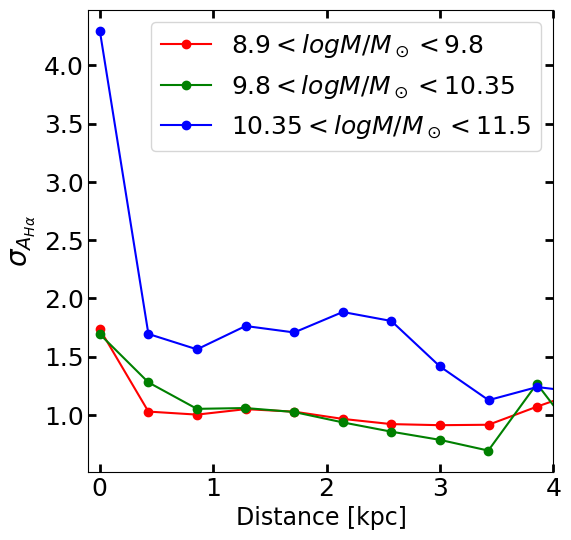

In [6]:
# plot the radial scatter, std vs r, in 1 plot and the same style
fig = plt.subplots(figsize=(6,6))
for i in range(3):
    plt.plot(binned_radius[i], calculate_attenuation_err(median_balmer_err[i]), label=bin_label_m[i],marker='o',color=['r','g','b'][i])
    #plt.axhline(np.mean(calculate_attenuation_err(median_balmer_err[i])), linestyle='--',linewidth=2,alpha=0.3,color=['r','g','b'][i])

plt.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length

plt.xlabel('Distance [kpc]',fontsize=17)
plt.ylabel(r"$\sigma_{A_{H\alpha}}$",fontsize=20)
plt.legend(loc='upper right')
#plt.ylim(0,3)
plt.xlim(-0.1,4)

things can be written in results or discussion:

disagreement in the center region

disagreement around 1 1.5 radius

other places: maybe ok?



disagreement in the center
    3dhst theoretical data: psf deconvolved? -> higher flux in both ha hb center
    too strong NII correction for Ha?; gradient correction needed?

higher dust attenutation in around 1-1.5 region
    maybe due to the hb convolved with the matching kernel? so the size of the Hb spreads out.

other problems:
    very high error from the scatter of the data points v.s. small error from the integrated results from others work
    z range of CLEAR is larger towards the low z end. SO redshift binning maybe also needed? (but small sample size)






## add redshift binning

[[4.166058953603109, 3.9023774385452272, 3.4442604064941404, 3.1556097825368243, 3.2348018169403074, 3.3133384943008424, 3.1589589516321817, 2.8518789291381834, 2.6488530317942303, 2.6549775123596193, 2.723848263422648, 2.8031737208366394, 2.55712653696537, 2.3023143212000527], [3.0011487819931726, 2.7922796181270053, 2.7693355798721315, 2.9633972828204813, 2.6258314569791157, 2.5997850639479503, 2.675598043661851, 2.5218256818396703, 2.4398037493228912, 2.207368375857671, 2.2736145045076097, 2.0338032160486494, 2.0640085509845187, 2.246657357766078], [3.842582649198072, 3.89240251382192, 3.685638936360677, 4.051975250244141, 3.8219640572865803, 3.435404634475708, 2.9164448181788125, 2.8572105884552004, 2.850703112781048, 3.1365884860356648, 2.786134386062622, 2.5225688020388284, 2.187297022342682, 2.033538313706716], [4.3539454372305615, 3.380313421998705, 3.374408849648067, 3.4245354873793468, 3.4598698956625804, 3.3616072961262295, 3.2119047216006686, 3.118707435471671, 2.8753747940

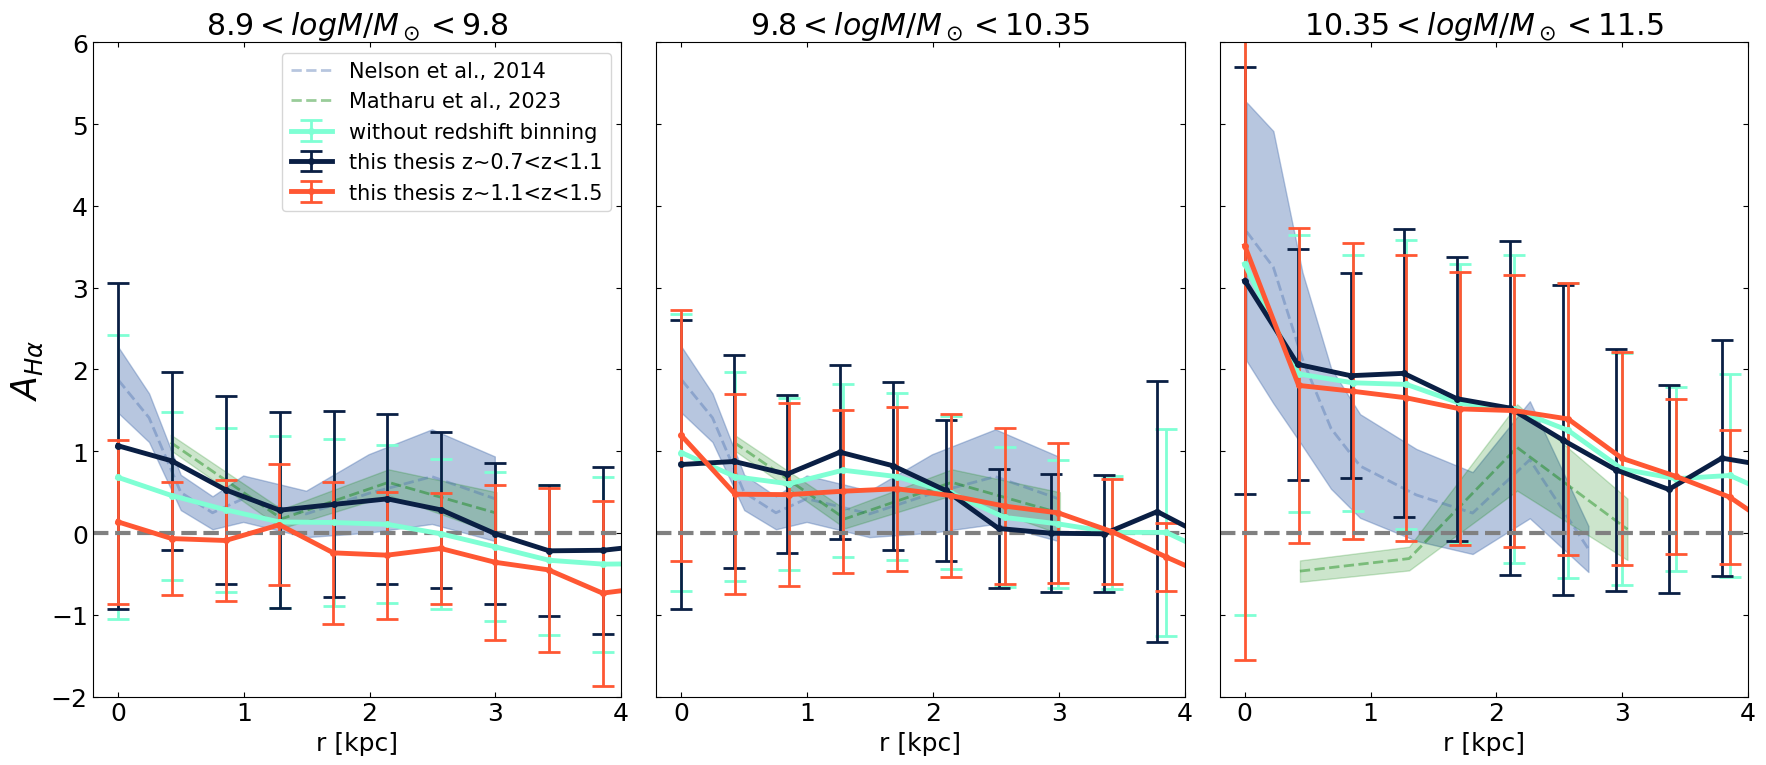

In [7]:
def bin_center(r_lis):
    diff = np.diff(r_lis)  # Calculate differences between consecutive elements
    diff = diff[diff > 0]  # Keep only positive differences
    return r_lis + np.mean(diff) / 2  # Return r_lis plus half the mean of the differences

binned_radius = []
median_balmer = []
median_balmer_err = []

for i in range(len(bins_m) - 1):
    for j in range(len(bins_z) - 1):
        r_lis = np.array([])  # Initialize r_lis as an empty array
        balmer_lis = np.array([])  # Initialize balmer_lis as an empty array

        for obj in obj_lis_sel[np.logical_and(obj_lis_sel['bin_m'] == i + 1, obj_lis_sel['bin_z'] == j + 1)]:
            path = f"data_extracted/{file_name(obj, prefix='extracted')}"  # Construct the file path
            with fits.open(path) as hdu:
                r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
                # Read and transpose data from the FITS file

                r_lis = np.append(r_lis, r)  # Append r to r_lis
                balmer_lis = np.append(balmer_lis, balmer_r)  # Append balmer_r to balmer_lis
        r_bins_center = bin_center(r_lis)  # Calculate the center of r_lis
        mask = np.logical_and(r_lis < 6, balmer_lis > -1000)  # Create a mask to filter r_lis < 3 and balmer_lis < 12
        # Radius binning and taking medians
        bin_edges = np.linspace(np.min(r_lis[mask]), np.max(r_lis[mask]), num=15)  # Calculate bin edges
        bin_indices = np.digitize(r_lis[mask], bin_edges)  # Assign r_lis values to bins
        median_values = [np.mean(balmer_lis[mask][bin_indices == k]) for k in range(1, len(bin_edges))]  # Calculate median values for each bin
        std_values = [np.std(balmer_lis[mask][bin_indices == k]) for k in range(1, len(bin_edges))]  # Calculate standard deviation for each bin
        std_r_values = [np.std(r_lis[mask][bin_indices == k]) for k in range(1, len(bin_edges))]
        # Plot medians
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
        binned_radius.append(bin_edges[:-1])
        median_balmer.append(median_values)
        median_balmer_err.append(std_values)

print(median_balmer)
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
hst3d_label = ['LogM=[9.0,9.2]', 'LogM=[9.2,9.8]', 'LogM=[9.8,11]']
jwst_label = ['LogM=[7.6,9.0]', 'LogM=[9.0,10.0]', 'LogM=[10.0,11]']

for i, ax in enumerate(axes):
    ax.tick_params(direction='in', which='both', top=True, right=True)

    # ----------------- 文献数据 -----------------
    # 3D-HST数据
    r_theo1, balmer_theo1, balmer_err_theo1 = hst3d_result(['middle', 'middle', 'high'][i])
    balmer_theo1 = calculate_attenuation(balmer_theo1)
    balmer_err_theo1 = calculate_attenuation_err(balmer_err_theo1)
    if i == 0:
        index = 1
    else:
        index = i
    ax.plot(r_theo1, balmer_theo1, marker=None, linestyle='--', linewidth=2,
                color="#4C72B0", label='Nelson et al., 2014',alpha=0.4)#f'3D-HST\nz~1.4\n{hst3d_label[index]}')
    ax.fill_between(r_theo1, 
                        balmer_theo1 - balmer_err_theo1,
                        balmer_theo1 + balmer_err_theo1,
                        color="#4C72B0", alpha=0.4)
    
    # JWST数据
    r_theo2, balmer_theo2, balmer_err_theo2 = jwst_result(['middle', 'middle', 'high'][i])
    balmer_theo2     = calculate_attenuation(balmer_theo2)
    balmer_err_theo2 = calculate_attenuation_err(balmer_err_theo2)
    ax.plot(r_theo2, balmer_theo2, marker=None, linestyle='--',
                color="g", linewidth=2, 
                label='Matharu et al., 2023',alpha=0.4)#f'JWST\nz:[1.0,1.7]\n{jwst_label[index]}')
    ax.fill_between(r_theo2, 
                        balmer_theo2 - balmer_err_theo2,
                        balmer_theo2 + balmer_err_theo2,
                        color="g", alpha=0.2)
                        
    ax.errorbar(binned_radius_noz[i], calculate_attenuation(median_balmer_noz[i]), yerr=calculate_attenuation_err(median_balmer_err_noz[i]),
                fmt='-', color="aquamarine", alpha=1, linewidth=3.5,
                marker='o', markersize=4, label='without redshift binning', elinewidth=2,capsize=8,capthick=2)
    
    # Plot actual results for different redshifts
    for j in range(len(bins_z) - 1):
        r = binned_radius[i * (len(bins_z) - 1) + j]
        median = median_balmer[i * (len(bins_z) - 1) + j]
        std = median_balmer_err[i * (len(bins_z) - 1) + j]
        
        ax.errorbar(r, calculate_attenuation(median), yerr=calculate_attenuation_err(std), marker='o', fmt='-', color=["#0A1F44", "#FF5733"][j], label=f'this thesis z~{bin_label_z[j]}',linewidth=3.5, markersize=4, 
                        elinewidth=2,capsize=8,capthick=2)  # Add label for distinction
        #plot unbinned data


    ax.axhline(0, 0, 7, linestyle='--', color='grey',linewidth=3)
    
    # Add legend
    if i == 0:
        ax.legend(fontsize=15)
    # Add title and axis labels
    ax.set_title(bin_label_m[i])
    ax.set_xlabel('r [kpc]')
    if i == 0:
        ax.set_ylabel(r'$A_{H\alpha}$', fontsize=25)
    if i != 0:
        ax.set_yticklabels([])
    ax.set_ylim(-2, 6)
    ax.set_xlim(-0.2,4)
# Display the plot
plt.tight_layout()
plt.savefig('image_outputs/Ha_Hb_z_kpc')
plt.show()


# radial profiles, in r_eff

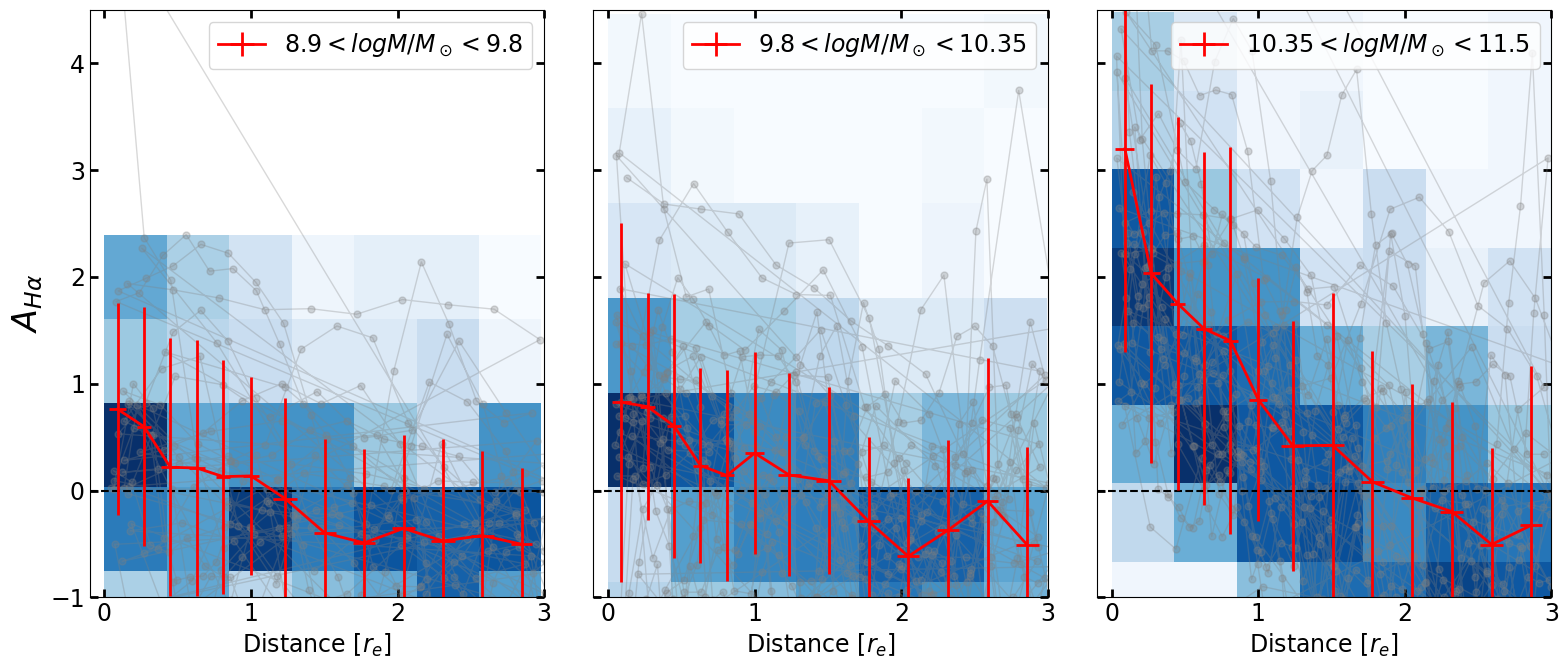

In [8]:
fig = plt.figure(figsize=(16, 7))
#set general fontsize 
plt.rcParams.update({'font.size': 17})
balmer_median_lis = []
std_values_lis = []
binned_radius = []
for i in range(len(bins_m) - 1):
    ax = fig.add_subplot(1, 3, i + 1)
    r_lis = np.array([])
    r_bins_center = np.array([])
    A_lis = np.array([])

    for obj in obj_lis_sel[obj_lis_sel['bin_m'] == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"
        with fits.open(path) as hdu:
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
            # Convert actual radius to effective radius
            r = r / (obj['re']*obj['pixel_length']/0.1)
            r_bins_center = np.append(r_bins_center,bin_center(r))
            r_lis = np.append(r_lis, r)
            A_lis = np.append(A_lis, balmer_r)

    # Mask
    mask = np.logical_and(r_lis < 3, A_lis>0)
    mask_for_plot = np.logical_and(r_lis < 3, (A_lis < 15)&(A_lis>0))
    #mask = r_lis<3
    plt.hist2d(r_lis[mask_for_plot], calculate_attenuation(A_lis[mask_for_plot]), bins=(7, 12), cmap='Blues')
    plt.plot(r_bins_center[mask], calculate_attenuation(A_lis[mask]), 
                linewidth=1, marker='o', markersize=5, 
                color='grey', alpha=0.3)
    plt.xlabel(r'Distance [$r_e$]',fontsize=17)
    plt.axhline(0, 0, 7, linestyle='--', color='black',alpha=1)
    #make color bar ticks smaller
    #plt.colorbar().ax.tick_params(labelsize=15)

    # Bin the radius and calculate the median of each binned radius
    bin_edges = np.append(np.linspace(np.min(r_lis[mask]),0.9,num=6),np.linspace(1.1, np.max(r_lis[mask]), num=8))
    bin_indices = np.digitize(r_lis[mask], bin_edges)
    bin_indices_for_plot = np.digitize(r_lis[mask_for_plot], bin_edges)
    median_values = [np.mean(A_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]
    std_values    = [np.std(A_lis[mask_for_plot][bin_indices_for_plot == j]) for j in range(1, len(bin_edges))]
    std_values_lis.append(std_values)
    binned_radius.append(bin_edges[:-1])
    std_r_values = [np.std(r_lis[mask][bin_indices==j])for j in range(1,len(bin_edges))]


    # Plot the median line
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(bin_centers, calculate_attenuation(median_values),yerr= calculate_attenuation_err(std_values),xerr=std_r_values,
                 fmt='r-', linewidth=2,
                 label = f'{bin_label_m[i]}')
    plt.ylim(-2,4)
    if i ==0:
        plt.ylabel(r'$A_{H\alpha}$',fontsize=24)
    if i != 0:
        ax.set_yticklabels([])
    #make ticks appeear on all axis and sticks inside,also make tick line thick and long
    plt.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length

    balmer_median_lis.append(np.array(median_values))
    plt.xlim(-0.1,3)
    plt.ylim(-1,4.5)
    plt.legend(fontsize=17, loc='upper right')
plt.tight_layout()
plt.savefig('radial_balmer_decrem/Balmer_decrem_re')
plt.show()

binned_radius_noz = binned_radius
median_balmer_noz = balmer_median_lis
median_balmer_err_noz = std_values_lis

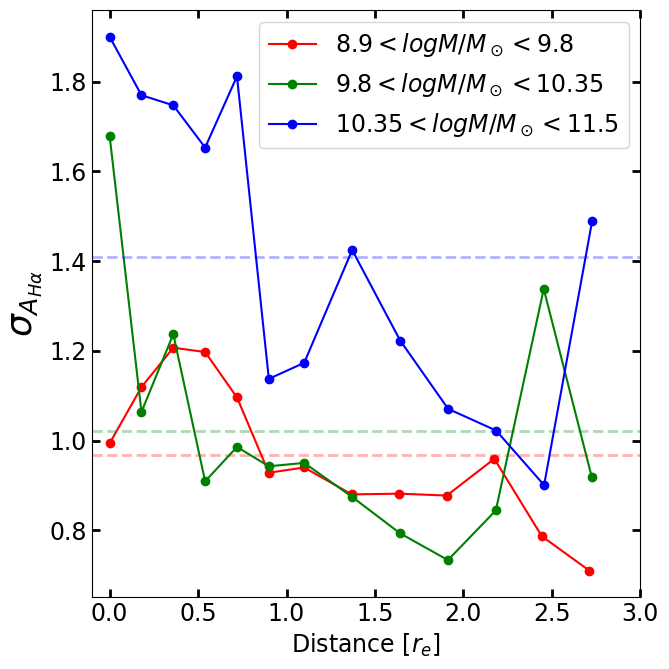

In [9]:
# plot the radial scatter, std vs r, in 1 plot and the same style
fig = plt.subplots(figsize=(7,7))
for i in range(3):
    plt.plot(binned_radius[i], calculate_attenuation_err(std_values_lis[i]), label=bin_label_m[i],marker='o',color=['r','g','b'][i])
    plt.axhline(np.mean(calculate_attenuation_err(std_values_lis[i])), linestyle='--',linewidth=2,alpha=0.3,color=['r','g','b'][i])
plt.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length

plt.xlabel('Distance [$r_e$]',fontsize=17)
plt.ylabel(r"$\sigma_{A_{H\alpha}}$",fontsize=26)
plt.legend(loc='upper right')

#plt.ylim(0,3)
plt.xlim(-0.1,3)
plt.tight_layout()
plt.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length
plt.savefig('image_outputs/std_vs_r')

# H alpha in r_eff

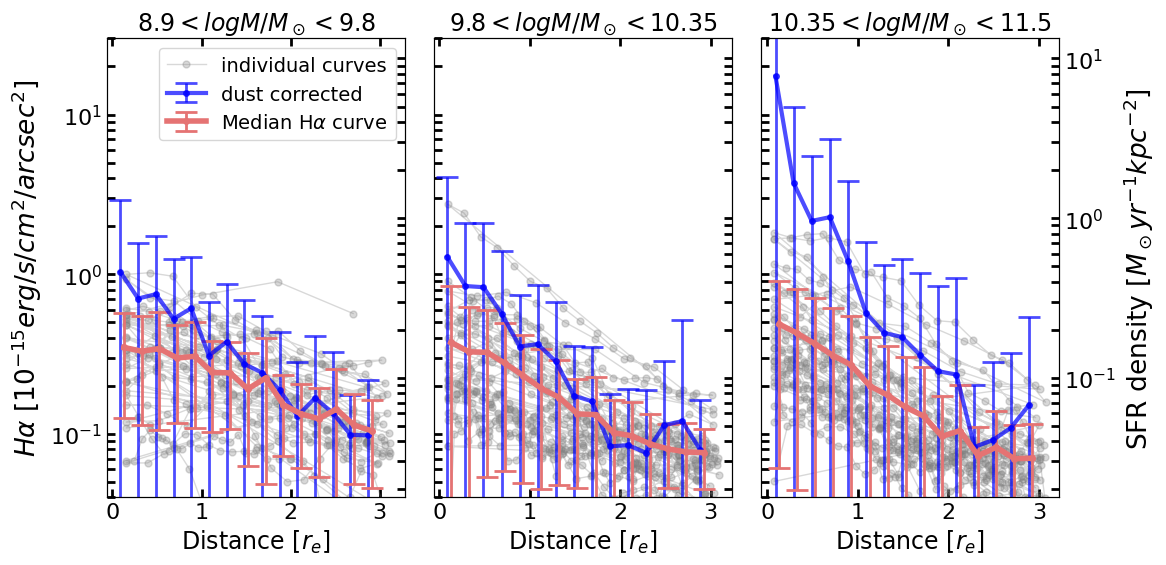

In [10]:
scale_to_sfr = 9.523*4.68 * 0.01

obj_lis_sel = obj_lis[select]
#obj_lis_sel = obj_lis_sel[:10]
#use back end to display the plot
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)  # Add sharey=True to share y-axis
plt.rcParams.update({'font.size': 18})

def bin_center(r_lis):
    diff = np.diff(r_lis)  # Calculate differences between consecutive elements
    diff = diff[diff > 0]  # Keep only positive differences
    return r_lis + np.mean(diff) / 2  # Return r_lis plus half the mean of the differences

binned_radius = []
median_balmer = []
median_balmer_err = []

for i,ax in enumerate(axes[:]):
    if i !=0: ax.set_yticklabels([])

    r_lis = np.array([])  # Initialize r_lis as an empty array
    balmer_lis = np.array([])  # Initialize balmer_lis as an empty array
    balmer_err_lis = np.array([])  # Initialize balmer_err_lis as an empty array

    for obj in obj_lis_sel[binning_m_sel == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"  # Construct the file path
        with fits.open(path) as hdu:
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
            # Read and transpose data from the FITS file
            r = r/(obj['re']/0.1 * obj['pixel_length'])
            r_lis = np.append(r_lis, r)  # Append r to r_lis
            balmer_lis = np.append(balmer_lis, ha_r)  # Append balmer_r to balmer_lis
            balmer_err_lis = np.append(balmer_err_lis, ha_r_err)

    r_bins_center = bin_center(r_lis)  # Calculate the center of r_lis

    mask = np.logical_and(r_lis < 3, balmer_lis < 12000)  # Create a mask to filter r_lis < 3 and balmer_lis < 12
    mask_for_plot = np.logical_and(r_lis < 3, balmer_lis < 10)  # Create a mask for plotting
    #ax.hist2d(r_lis[mask_for_plot], balmer_lis[mask_for_plot], bins=(10, 42), cmap='Blues')  # Plot a 2D histogram
    #add color bar
    #cbar = plt.colorbar(hist[3], ax=ax)

    ax.plot(r_bins_center[mask], balmer_lis[mask], linewidth=1, marker='o', markersize=5, color='grey', alpha=0.3, label='individual curves')  # Plot a scatter plot
    # Radius binning and taking medians
    bin_edges = np.linspace(np.min(r_lis[mask]), np.max(r_lis[mask]), num=16)  # Calculate bin edges
    bin_indices = np.digitize(r_lis[mask], bin_edges)  # Assign r_lis values to bins
    median_values = [np.mean(balmer_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate median values for each bin
    std_values = [np.std(balmer_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate standard deviation for each bin
    std_r_values = [np.std(r_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]
    # Plot medians
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers   
    # Save results
    binned_radius.append(bin_centers)
    median_balmer.append(median_values)
    median_balmer_err.append(std_values)
#plt.savefig('radial_balmer_decrem/test_radial_profile_median')
#plt.show()  # Display the figure

ha_no_corr_r_lis = binned_radius
ha_no_corr_lis = median_balmer
ha_no_corr_err_lis = median_balmer_err
#---------------------------------------------------------------------------------------------------
ha_corrected_r_lis = []
ha_corrected_lis = []
ha_corrected_err_lis = []
for i, ax in enumerate(axes[:]):
    r_lis = np.array([])  # Initialize r_lis as an empty array
    ha_corr_lis = np.array([])  # Initialize balmer_err_lis as an empty array
    ha_corr_err_lis = np.array([])  # Initialize balmer_err_lis as an empty array

    for obj in obj_lis_sel[binning_m_sel == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"  # Construct the file path
        with fits.open(path) as hdu:
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
            # Read and transpose data from the FITS file
            r = r / (obj['re'] / 0.1 * obj['pixel_length'])
            ha_cor = ha_r * 10 ** (A_a*0.4)
            r_lis = np.append(r_lis, r)  # Append r to r_lis
            ha_corr_lis = np.append(ha_corr_lis, ha_cor)
            ha_corr_err_lis = np.append(ha_corr_err_lis, ha_r_err)

    mask = np.logical_and(r_lis < 3, np.isfinite(ha_corr_lis))  # Create a mask to filter r_lis < 3 and balmer_lis < 12
    r_bins_center = bin_center(r_lis)  # Calculate the center of r_lis

    # Radius binning and taking medians
    bin_edges = np.linspace(np.nanmin(r_lis[mask]), np.nanmax(r_lis[mask]), num=16)  # Calculate bin edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
    r = bin_centers
    bin_indices = np.digitize(r_lis[mask], bin_edges)  # Assign r_lis values to bins
    median_ha_corr = [np.mean(ha_corr_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate median values for each bin
    std_ha_corr = [np.std(ha_corr_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate standard deviation for each bin
    std_r_ha_corr = [np.std(r_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]
    ha_corrected_r_lis.append(bin_centers)
    ha_corrected_lis.append(median_ha_corr)
    ha_corrected_err_lis.append(std_ha_corr)
    # Plot medians
    r_var = ha_no_corr_r_lis[i]
    median = ha_no_corr_lis[i]
    std = ha_no_corr_err_lis[i]


    ax.errorbar(r-0.01, median_ha_corr, yerr=std_ha_corr, fmt='-', color='b', alpha=0.7, linewidth=3, marker='o', markersize=4, elinewidth=2, label='dust corrected',capsize=8,capthick=2)  # Add label for distinction
    ax.errorbar(r_var+0.03, median, yerr=std, fmt='-', color="#E57373", alpha=1, linewidth=4, marker='o', markersize=4, elinewidth=2,capsize=8,capthick=2,label=r'Median H$\alpha$ curve')  # Add label for distinction
    
    
    ax.set_title(bin_label_m[i],fontsize=17)  # Set the subplot title
    ax.set_yscale('log')
    if i ==0:
        ax.set_ylabel(r"$H\alpha$ [$10^{-15} erg/s/cm^2/arcsec^2$]", fontsize=19)
        ax.legend(loc='upper right',fontsize=14)

    ax.set_xlabel('Distance $[r_e]$',fontsize=17)

    ax.set_ylim(1e-2*4, 30)
    ax.set_yscale('log')

    ax_var = ax.twinx()
    ax_var.set_ylim(1e-2*4*scale_to_sfr, 30*scale_to_sfr)
    ax_var.set_yscale('log')
    ax.tick_params(direction='in', which='both', top=True, right=False, width=2, length=6,labelsize=16)  # Set tick width and length
    ax_var.tick_params(direction='in', which='both', top=False, right=True, width=2, length=6,labelsize=16)  # Set tick width and length
    if i != 2:
        ax_var.set_yticklabels([])
    else:
        ax_var.set_ylabel(r'SFR density [$M_\odot yr^{-1} kpc^{-2}$]', fontsize=19,)
# Remove horizontal space between plots
plt.subplots_adjust(wspace=0)

# Display the plot
plt.tight_layout()
plt.savefig('image_outputs/ha_re')
plt.show()



# SFR

$8.9<logM/M_\odot<9.8$:
Chi-squared: 0.013327528037359369
Reduced chi-squared: 0.0016659410046699211
p-value: 0.9999999999182755



$9.8<logM/M_\odot<10.35$:
Chi-squared: 0.011867535038333321
Reduced chi-squared: 0.0014834418797916651
p-value: 0.9999999999485898



$10.35<logM/M_\odot<11.5$:
Chi-squared: 0.05782745548955431
Reduced chi-squared: 0.007228431936194288
p-value: 0.9999999715446259





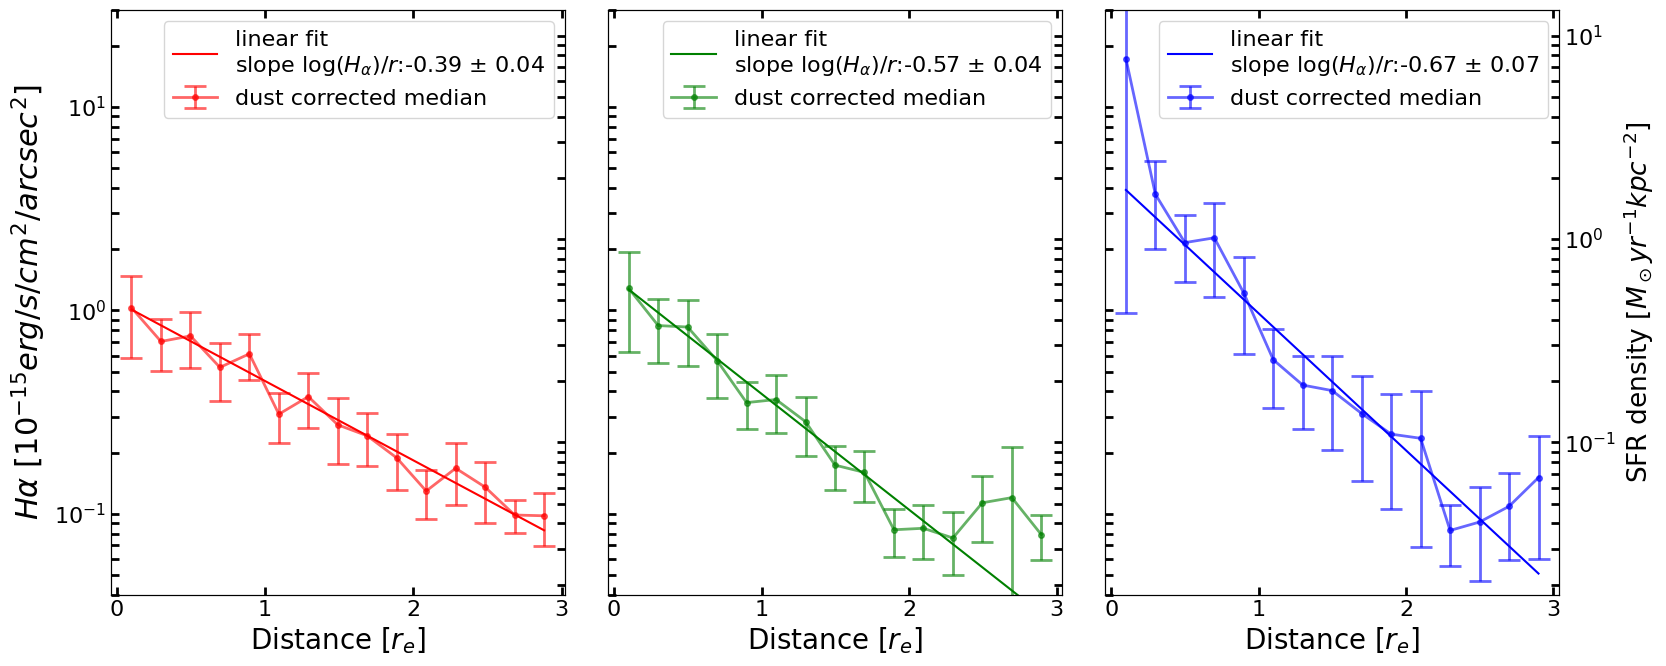

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(17, 7), sharey=True)  # Add sharey=True to share y-axis

def linear(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
from scipy.stats import chisquare, chi2

for i, [r, ha, ha_err] in enumerate(zip(ha_corrected_r_lis, ha_corrected_lis, ha_corrected_err_lis)):
    ax = axes[i]
    r = np.array(r)
    ha = np.array(ha)
    ha_err = np.array(ha_err)
    
    offset = [-0.02, 0.02, 0]
    ax.errorbar(r, ha, yerr=ha_err/(np.sqrt(len(ha_err))*1.1), fmt='-', color=['r', 'g', 'b'][i], alpha=0.6, linewidth=2, marker='o', markersize=4, elinewidth=2, capsize=8, capthick=2, label=r'dust corrected median')  # Add label for distinction
    if i < 2:
        mask = (r > 0) & (r < 2)
    else:
        mask = (r > 0.8) & (r < 2.8)
    #mask = r < 2

    popt, pcov = curve_fit(linear, r[mask], np.log10(ha[mask]), sigma=(1 / ha_err[mask]) / np.sqrt(len(ha_err[mask])))
    #check the fit chi2 chi2 reduced and p values
    popt, pcov = curve_fit(linear, r[mask], np.log10(ha[mask]), sigma=(1 / ha_err[mask]) / np.sqrt(len(ha_err[mask])))
    # 计算拟合值
    fitted_values = linear(r[mask], *popt)
    # 计算卡方值
    chi2_statistic = np.sum(((np.log10(ha[mask]) - fitted_values) / (1 / ha_err[mask])) ** 2)
    # 计算自由度
    degrees_of_freedom = len(ha[mask]) - len(popt)
    # 计算减少卡方值
    chi2_reduced = chi2_statistic / degrees_of_freedom
    # 计算 p 值
    p_value = 1 - chi2.cdf(chi2_statistic, degrees_of_freedom)
    print(f'{bin_label_m[i]}:')
    print(f"Chi-squared: {chi2_statistic}")
    print(f"Reduced chi-squared: {chi2_reduced}")
    print(f"p-value: {p_value}")
    print('\n\n')
    ax.plot(r, 10**linear(r, *popt), color=['r', 'g', 'b'][i], label=f'linear fit\nslope log($H_\\alpha)/r$:{popt[0]:.2f} $\pm$ {np.sqrt(pcov[0,0]):.2f}')
    
    ax.set_ylim(1e-2 * 4, 30)
    ax.set_yscale('log')

    ax_var = ax.twinx()
    ax_var.set_ylim(1e-2 * 4 * scale_to_sfr, 30 * scale_to_sfr)
    ax_var.set_yscale('log')
    ax.tick_params(direction='in', which='both', top=True, right=False, width=2, length=6, labelsize=16)  # Set tick width and length
    ax_var.tick_params(direction='in', which='both', top=False, right=True, width=2, length=6, labelsize=16)  # Set tick width and length
    ax.set_xlabel(r'Distance [$r_e$]', fontsize=20)
    if i == 0:
        ax.set_ylabel(r"$H\alpha$ [$10^{-15} erg/s/cm^2/arcsec^2$]", fontsize=22)
    # 添加图例
    ax.legend(fontsize=16)
    ax.tick_params(direction='in', which='both', right=False, top=True, width=2, length=6)  # Set tick width and length
    if i != 2:
        ax_var.set_yticklabels([])
    else:
        ax_var.set_ylabel(r'SFR density [$M_\odot yr^{-1} kpc^{-2}$]', fontsize=19)

plt.tight_layout()
plt.savefig('image_outputs/ha_re_corr.png')
plt.show()


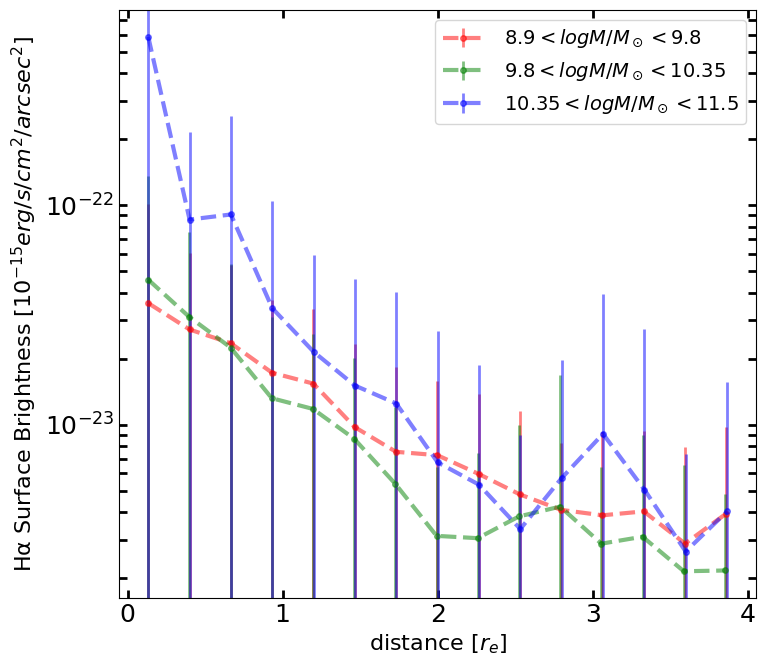

In [12]:
obj_lis_sel = obj_lis[select]
#obj_lis_sel = obj_lis_sel[:10]
#use back end to display the plot
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)  # Add sharey=True to share y-axis
plt.rcParams.update({'font.size': 18})

def bin_center(r_lis):
    diff = np.diff(r_lis)  # Calculate differences between consecutive elements
    diff = diff[diff > 0]  # Keep only positive differences
    return r_lis + np.mean(diff) / 2  # Return r_lis plus half the mean of the differences

binned_radius = []
median_balmer = []
median_balmer_err = []

for i in range(len(bins_m) - 1):
    ax = axes[i]  # Add a subplot in a 1x3 grid
    ax.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length
    if i !=0: ax.set_yticklabels([])

    r_lis = np.array([])  # Initialize r_lis as an empty array
    balmer_lis = np.array([])  # Initialize balmer_lis as an empty array
    balmer_err_lis = np.array([])  # Initialize balmer_err_lis as an empty array

    for obj in obj_lis_sel[binning_m_sel == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"  # Construct the file path
        with fits.open(path) as hdu:
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
            # Read and transpose data from the FITS file
            r = r/(obj['re']/0.1 * obj['pixel_length'])
            r_lis = np.append(r_lis, r)  # Append r to r_lis
            balmer_lis = np.append(balmer_lis, ha_r*4.68*1e-42*1e15*(obj['pixel_length']/0.1)**2)  # Append balmer_r to balmer_lis
            balmer_err_lis = np.append(balmer_err_lis, ha_r_err)

    r_bins_center = bin_center(r_lis)  # Calculate the center of r_lis

    mask = np.logical_and(r_lis < 4, balmer_lis < 12000)  # Create a mask to filter r_lis < 3 and balmer_lis < 12
    mask_for_plot = np.logical_and(r_lis < 4, balmer_lis < 10)  # Create a mask for plotting
    #ax.hist2d(r_lis[mask_for_plot], balmer_lis[mask_for_plot], bins=(10, 42), cmap='Blues')  # Plot a 2D histogram
    #add color bar
    #cbar = plt.colorbar(hist[3], ax=ax)

    ax.plot(r_bins_center[mask], balmer_lis[mask], linewidth=1, marker='o', markersize=5, color='grey', alpha=0.3, label='data points')  # Plot a scatter plot
    # Radius binning and taking medians
    bin_edges = np.linspace(np.min(r_lis[mask]), np.max(r_lis[mask]), num=16)  # Calculate bin edges
    bin_indices = np.digitize(r_lis[mask], bin_edges)  # Assign r_lis values to bins
    median_values = [np.mean(balmer_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate median values for each bin
    std_values = [np.std(balmer_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate standard deviation for each bin
    std_r_values = [np.std(r_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]
    # Plot medians
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
    ax.errorbar(bin_centers, median_values, yerr=std_values, xerr=std_r_values, fmt='--', color="#E57373", alpha=1, linewidth=3, marker='o', markersize=4, label=r'Median H$\alpha$ curve', elinewidth=2)  # Plot medians with error bars
    
    ax.set_title(f'{len(obj_lis_sel[binning_m_sel == i + 1])} galaxies, {bin_label_m[i]}',fontsize=17)  # Set the subplot title
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_yscale('log')
    if i ==0:
        ax.set_ylabel(r"Ha Profile [$10^{-15} erg/s/cm^2/arcsec^2$]", fontsize=19)
    if i == 2:
        ax.legend(loc='upper right',fontsize=14)
    #if i == 0:
    #    ax.set_xlabel('diastance $[r_e]$',fontsize=17)
    #else:
    #    ax.set_xticklabels([])
    ax.axhline(2.86, 0, 7, linestyle='--', color='white')  # Draw a horizontal line
    # Save results
    binned_radius.append(bin_centers)
    median_balmer.append(median_values)
    median_balmer_err.append(std_values)
#plt.savefig('radial_balmer_decrem/test_radial_profile_median')
#plt.show()  # Display the figure

ha_no_corr_r_lis = binned_radius
ha_no_corr_lis = median_balmer
ha_no_corr_err_lis = median_balmer_err
#---------------------------------------------------------------------------------------------------
ha_corrected_r_lis = []
ha_corrected_lis = []
ha_corrected_err_lis = []
for i, ax in enumerate(axes[:]):
    ax.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length

    r_lis = np.array([])  # Initialize r_lis as an empty array
    ha_corr_lis = np.array([])  # Initialize balmer_err_lis as an empty array
    ha_corr_err_lis = np.array([])  # Initialize balmer_err_lis as an empty array

    for obj in obj_lis_sel[binning_m_sel == i + 1]:
        path = f"data_extracted/{file_name(obj, prefix='extracted')}"  # Construct the file path
        with fits.open(path) as hdu:
            r, ha_r, ha_r_err, hb_r, hb_r_err, balmer_r, balmer_r_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
            # Read and transpose data from the FITS file
            r = r / (obj['re'] / 0.1 * obj['pixel_length'])
            ha_cor = ha_r * 10 ** (A_a*0.4)
            r_lis = np.append(r_lis, r)  # Append r to r_lis
            ha_corr_lis = np.append(ha_corr_lis, ha_cor*5.55*1e-42*1e17*(obj['pixel_length']/0.1)**2)
            ha_corr_err_lis = np.append(ha_corr_err_lis, ha_r_err)

    mask = np.logical_and(r_lis < 4, np.isfinite(ha_corr_lis))  # Create a mask to filter r_lis < 3 and balmer_lis < 12
    r_bins_center = bin_center(r_lis)  # Calculate the center of r_lis

    # Radius binning and taking medians
    bin_edges = np.linspace(np.nanmin(r_lis[mask]), np.nanmax(r_lis[mask]), num=16)  # Calculate bin edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
    r = bin_centers
    bin_indices = np.digitize(r_lis[mask], bin_edges)  # Assign r_lis values to bins
    median_ha_corr = [np.mean(ha_corr_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate median values for each bin
    std_ha_corr = [np.std(ha_corr_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]  # Calculate standard deviation for each bin
    std_r_ha_corr = [np.std(r_lis[mask][bin_indices == j]) for j in range(1, len(bin_edges))]
    ha_corrected_r_lis.append(bin_centers)
    ha_corrected_lis.append(median_ha_corr)
    ha_corrected_err_lis.append(std_ha_corr)
    # Plot medians
    r_var = ha_no_corr_r_lis[i]
    median = ha_no_corr_lis[i]
    std = ha_no_corr_err_lis[i]
    ax.errorbar(r, median_ha_corr, yerr=std_ha_corr, fmt='--', color='b', alpha=0.7, linewidth=3, marker='o', markersize=4, elinewidth=2, label='dust corrected')  # Add label for distinction
    ax.errorbar(r_var, median, yerr=std, fmt='--', color="#E57373", alpha=0.7, linewidth=3, marker='o', markersize=4, elinewidth=2)  # Add label for distinction

    # Add legend
    if i == 2:
        ax.legend(loc='upper right',fontsize=14)
    # Add title and axis labels
    #if i == 2:
    ax.set_xlabel('diastance $[r_e]$',fontsize=17)
    #else:
        #ax.set_xticklabels([])
    ax.set_ylim(1e-2*4, 30)
    ax.set_yscale('log')

# Remove horizontal space between plots
plt.subplots_adjust(wspace=0)

# Display the plot
plt.tight_layout()
plt.close()




plt.figure(figsize=(8, 7))  # 设置图形大小

for i, [r, ha, ha_err] in enumerate(zip(ha_corrected_r_lis, ha_corrected_lis, ha_corrected_err_lis)):
    plt.errorbar(r, ha, yerr=ha_err, fmt='--', color=['r', 'g', 'b'][i], alpha=0.5, linewidth=3, marker='o', markersize=4, elinewidth=2, label=f' {bin_label_m[i]}')
    plt.yscale('log')

# 添加标题和标签
plt.xlabel(r'distance [$r_e$]', fontsize=16)
plt.ylabel('Hα Surface Brightness [$10^{-15} erg/s/cm^2/arcsec^2$]', fontsize=16)
# 添加图例
plt.legend(fontsize=14)
plt.tick_params(direction='in', which='both', top=True, right=True, width=2, length=6)  # Set tick width and length
plt.tight_layout()
# 显示图形
plt.tight_layout()
plt.show()

In [13]:
#attenuation as a function of wavelength

/var/folders/6h/pm731bh5769gqlt1mrys7wth0000gn/T/ipykernel_16823/3999297939.py:122: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.errorbar(mass_bin_centers[i], calculate_attenuation_err(balmer_decrement_stds[i]), xerr=mass_std_z,


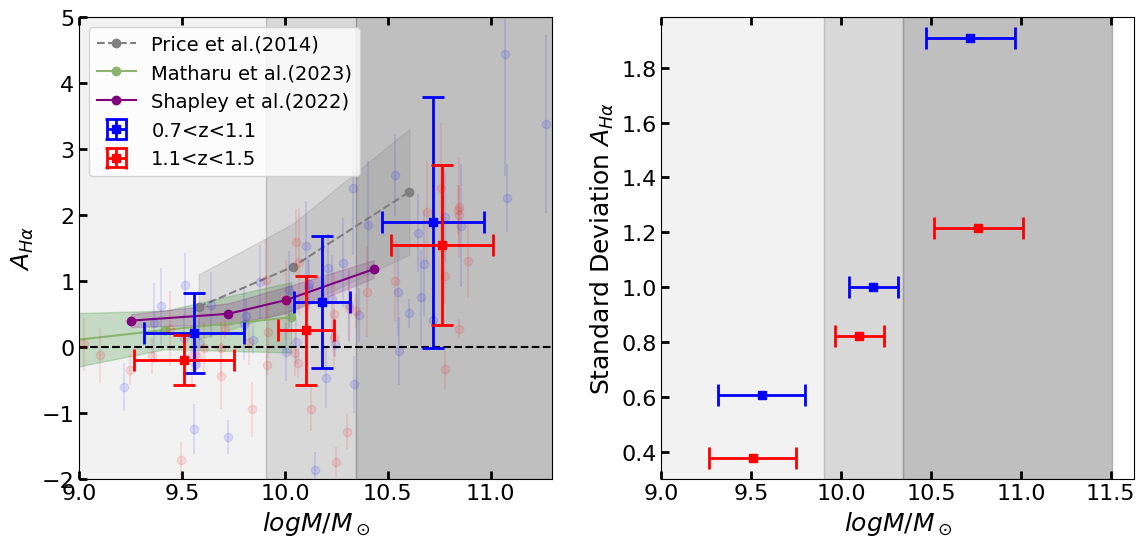

In [14]:
def nii_ha_ratio_zahid(stellar_mass, redshift):
    """
    Calculate the [NII]/Hα flux ratio based on the redshift-dependent empirical model by Zahid et al. (2014).

    Parameters:
    stellar_mass (float): Stellar mass of the galaxy (in solar masses)
    redshift (float): Redshift (z)

    Returns:
    float: Computed [NII]/Hα flux ratio
    """
    import numpy as np

    # Convert stellar mass to log scale
    logm = np.log10(stellar_mass)

    # Compute the redshift-dependent coefficient
    a_z = -1.32 + 0.4 * redshift

    # Apply Zahid et al. (2014) empirical relation
    log_nii_ha = a_z + 0.32 * (logm - 10) - 0.05 * (logm - 10)**2

    # Convert log value to actual ratio
    return 10**log_nii_ha

plt.rcParams.update({'font.size': 24}) 
obj_lis_sel = obj_lis[select]
# Calculate Balmer Decrement

ha_flux = obj_lis_sel['Ha_FLUX']/(1+nii_ha_ratio_zahid(obj_lis_sel['mass'],obj_lis_sel['z_MAP']))
hb_flux = obj_lis_sel['Hb_FLUX']
ha_flux_err = obj_lis_sel['Ha_FLUX_ERR']
hb_flux_err = obj_lis_sel['Hb_FLUX_ERR']

# Avoid division by zero
hb_flux[hb_flux == 0] = np.nan

# Calculate Balmer Decrement
balmer_decrement = ha_flux / hb_flux

# Calculate the error of Balmer Decrement
balmer_decrement_err = balmer_decrement * np.sqrt((ha_flux_err / ha_flux)**2 + (hb_flux_err / hb_flux)**2)

# Calculate weighted averages and standard deviations for each mass bin within each redshift bin
mass_bin_centers = []
balmer_decrement_means = []
balmer_decrement_stds = []

for z_bin, z_label in zip([binning_z_sel == i for i in range(1, len(bins_z))], bin_label_z):
    mass_bin_centers_z = []
    mass_std_z = []
    balmer_decrement_means_z = []
    balmer_decrement_stds_z = []

    for j in range(len(bins_m) - 1):
        mass_sub_bin = np.logical_and(z_bin, binning_m_sel == j + 1)
        
        if np.sum(mass_sub_bin) > 0:
            weighted_avg = np.mean(balmer_decrement[mass_sub_bin])
            weighted_std =  np.nanstd(balmer_decrement[mass_sub_bin])

            mass_std = np.std(np.log10(obj_lis_sel['mass'][mass_sub_bin]))


            mass_bin_centers_z.append(np.mean(np.log10(obj_lis_sel['mass'][mass_sub_bin])))
            mass_std_z.append(mass_std)
            balmer_decrement_means_z.append(weighted_avg)
            balmer_decrement_stds_z.append(weighted_std)

    mass_bin_centers.append(mass_bin_centers_z)
    balmer_decrement_means.append(balmer_decrement_means_z)
    balmer_decrement_stds.append(balmer_decrement_stds_z)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Balmer Decrement vs Mass
ax1.axhline(0, linestyle='--', color='black')

m_theo, b_theo, b_theo_err = integrated_hst3d()
#b_theo = calculate_attenuation(b_theo)
#b_theo_err = calculate_attenuation_err(b_theo_err)
m_theo1, b_theo1, b_theo_err1 = integrated_jwst()
b_theo1 = calculate_attenuation(b_theo1)
b_theo_err1 = calculate_attenuation_err(b_theo_err1)

m_theo2, b_theo2, b_theo_err2 = integrated_hst3d_var()
# Plot the results

colors = ['blue', 'red']
plotspan = mass_bins
# Literature value
ax1.plot(m_theo, b_theo, marker='o', linestyle='--', color='grey', label='Price et al.(2014)')
ax1.fill_between(m_theo, b_theo - b_theo_err, b_theo + b_theo_err, color='grey', alpha=0.2)
ax1.plot(m_theo1, b_theo1, marker='o', linestyle='-', color="#8CB46F", label='Matharu et al.(2023)')
ax1.fill_between(m_theo1, b_theo1 - b_theo_err1, b_theo1 + b_theo_err1, color='green', alpha=0.2)
ax1.plot(m_theo2, b_theo2, marker='o', linestyle='-', color='purple', label='Shapley et al.(2022)')
ax1.fill_between(m_theo2, b_theo2 - b_theo_err2, b_theo2 + b_theo_err2, color='purple', alpha=0.2)

for j in range(len(bins_m) - 1):
    ax1.axvspan(plotspan[j], plotspan[j + 1], color='grey', alpha=[0.1, 0.3, 0.5][j])
for i, z_label in enumerate(bin_label_z):
    ax1.errorbar(mass_bin_centers[i], calculate_attenuation(balmer_decrement_means[i]), yerr=calculate_attenuation_err(balmer_decrement_stds[i]), xerr=mass_std_z,marker='s', fmt='-', color=colors[i], alpha=1, label=z_label, linewidth=0,
                 elinewidth=2,capsize=8,capthick=2)
    ax1.errorbar(np.log10(obj_lis_sel['mass'][binning_z_sel == i + 1]), calculate_attenuation(balmer_decrement[binning_z_sel == i + 1]), yerr=calculate_attenuation_err(balmer_decrement_err[binning_z_sel == i + 1]), 
    fmt='o', color=colors[i], alpha=0.1)
ax1.set_xlim(9.0, 11.3)
ax1.set_ylim(-2, 5)
ax1.set_xlabel('$log M/M_\odot$', fontsize=18)
ax1.set_ylabel(r'$A_{H\alpha}$', fontsize=18)
ax1.legend(loc='upper left', fontsize=14)
# the same tick params as in the previous plot
ax1.tick_params(direction='in', which='both', top=True, right=False, width=2, length=6, labelsize=16)  # Set tick width and length

# Plot 2: Error in Balmer Decrement vs Mass
#ax2.plot(m_theo, b_theo_err, marker='o', linestyle='--', color='grey', label='3D-HST, Nelson et al.(2016) error')
#ax2.plot(m_theo1, b_theo_err1, marker='o', linestyle='-', color='green', label='JWST, Matharu et al.(2023) error')
for j in range(len(bins_m) - 1):
    ax2.axvspan(plotspan[j], plotspan[j + 1], color='grey', alpha=[0.1, 0.3, 0.5][j])

for i, z_label in enumerate(bin_label_z):
    ax2.errorbar(mass_bin_centers[i], calculate_attenuation_err(balmer_decrement_stds[i]), xerr=mass_std_z,
                 marker='s', fmt='o', color=colors[i], alpha=1, label=f'{z_label}',linewidth=0,elinewidth=2,capsize=8,capthick=2)
ax2.set_xlabel('$log M/M_\odot$', fontsize=18)
ax2.set_ylabel(r'Standard Deviation $A_{H\alpha}$', fontsize=18)
ax2.set_xlim(9,)
ax2.tick_params(direction='in', which='both', top=True, right=False, width=2, length=6, labelsize=16)  # Set tick width and length
plt.tight_layout()
plt.savefig('image_outputs/balmer_unresolve.png')
plt.show()



In [15]:
np.array(([9.580097087378642, 0.6047619047619047],
[10.03640776699029, 1.2095238095238097],
[10.604368932038835, 2.3476190476190477],
[9.742718446601941, 0.6142857142857141],
[10.189320388349515, 1.1999999999999997],
[10.830097087378642, 2.357142857142857],
[9.589805825242719, 1.095238095238095],
[10.04368932038835, 1.8619047619047615],
[10.614077669902912, 1.3952380952380952])).transpose()

#make the following data numpy
np.array([[9.2515741224627, 0.3958915115949814],
[9.724439359162371, 0.49876487502561323],
[10.005391729151942, 0.7082964023675739],
[10.430864081000255, 1.17576070115501],
[9.247450900041208, 0.2986400963236334],
[9.737451337457323, 0.33833215537941386],
[10.014197606182762, 0.5089589726707031],
[10.435318818792318, 1.0396252955436525]]).transpose()

array([[ 9.25157412,  9.72443936, 10.00539173, 10.43086408,  9.2474509 ,
         9.73745134, 10.01419761, 10.43531882],
       [ 0.39589151,  0.49876488,  0.7082964 ,  1.1757607 ,  0.2986401 ,
         0.33833216,  0.50895897,  1.0396253 ]])

In [16]:
https://academic.oup.com/mnras/article/513/3/4431/6570912

SyntaxError: invalid syntax (3445519495.py, line 1)

  0%|          | 0/87 [00:00<?, ?it/s]

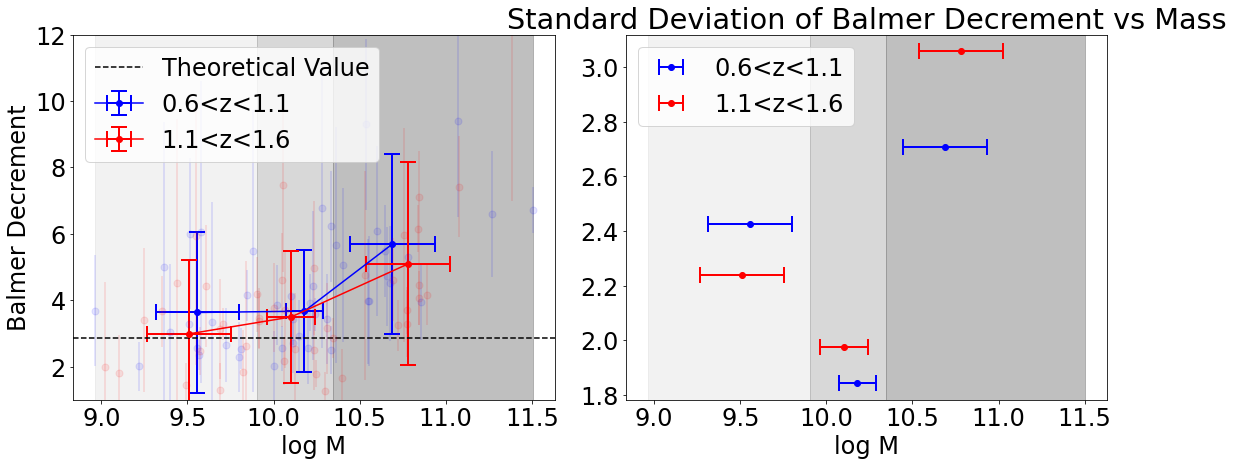

  0%|          | 0/87 [00:00<?, ?it/s]

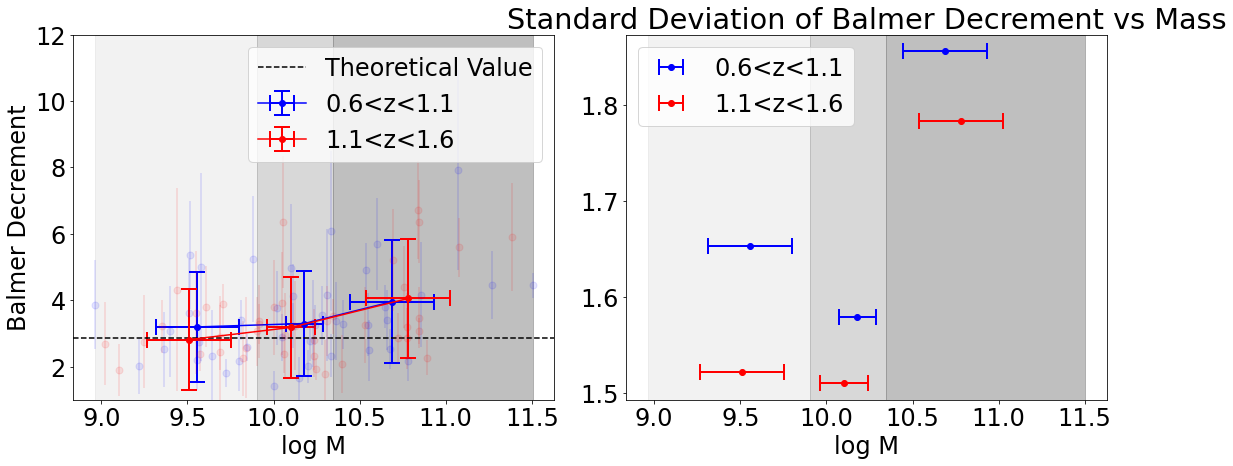

  0%|          | 0/87 [00:00<?, ?it/s]

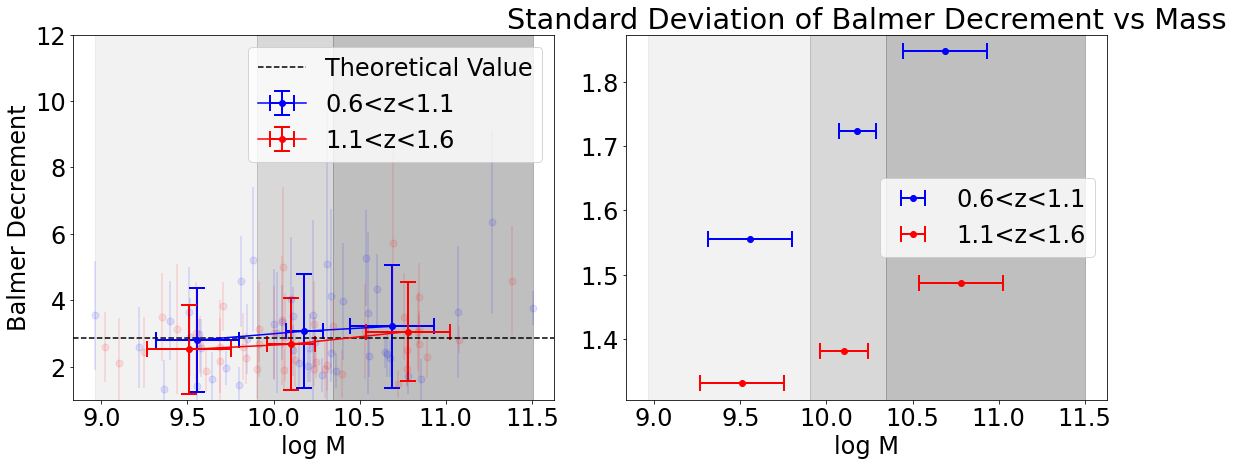

In [ ]:
import  numpy               as     np
from    scripts.tools       import *
from    scripts.packman     import *
from    astropy.table       import Table
from    astropy.io          import fits
from    astropy.cosmology   import Planck18
import  astropy.units       as     u
import  matplotlib.pyplot   as     plt
import  matplotlib.colors   as     colors  
from    matplotlib          import use
from    tqdm.notebook       import tqdm
from    concurrent.futures  import ThreadPoolExecutor, as_completed
import  sys, os
from    IPython.display     import clear_output
from    astropy.wcs         import WCS
from    photutils.aperture  import EllipticalAnnulus, EllipticalAperture, aperture_photometry, CircularAperture, CircularAnnulus
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

obj_lis = Table.read('obj_lis_selected.fits')

def radial_profile(obj, linemap, weight, seg, pixel_length,r_min, r_max,ha=False):
    # Here we try to use elliptical annuli to extract the radial profile
    # The semi major axis in arcsec, transformed to pixel:
    # The axis ratio
    axis_ratio = obj['q']
    # The semi major axis in pixel
    semi_major = r_min*obj['re'] / 0.1 #* pixel_length
    semi_major_out = r_max*obj['re'] / 0.1 #* pixel_length
    # The position angle
    pa = obj['pa']
    # The center of the object
    center = (linemap.data.shape[0] / 2, linemap.data.shape[1] / 2)
    # A series of elliptical annuli with the same width
    #if ellipse fits is good:
    if obj['f'] == 0:
        if r_min == 0:
        # The elliptical annuli
            center_annuli = [EllipticalAperture(center, semi_major_out, semi_major_out * axis_ratio, theta=-pa * u.deg.to(u.rad))]
        else:
            center_annuli = [EllipticalAnnulus(center, a_in=semi_major, a_out=semi_major_out, b_in=semi_major * axis_ratio, b_out=semi_major_out * axis_ratio, theta=-pa * u.deg.to(u.rad))]
    #else wse use circular annuli
    else:
        if r_min == 0:
            center_annuli = [CircularAperture(center, semi_major_out)]
        else:
            center_annuli = [CircularAnnulus(center,semi_major,semi_major_out)]
    # Initialize arrays to store the results
    ha_r = np.zeros(len(center_annuli))
    ha_r_err = np.zeros(len(center_annuli))
    mask = np.logical_or(seg != obj['ID'],linemap.data<=0)
    # Mask to select the object
    if ha:
        mask_pack = double_packman(linemap.data.shape[0],90,90)
        mask = np.logical_or(mask,mask_pack)
    else:
        mask_pack = double_packman(linemap.data.shape[0],90,90)
        mask = np.logical_or(mask,mask_pack)      
        mask = mask
    # Calculate the area of each annulus
    surface_area = [aperture.area_overlap(linemap,mask=mask,method='subpixel',subpixels=50) for aperture in center_annuli]

    error_data = np.where(weight.data**0.5 > 0, 1 / weight.data**0.5, np.nan)
    error_data[np.isinf(error_data)] = np.nan

    # Loop over each annulus and calculate the surface brightness
    for i, annulus in enumerate(center_annuli):
        phot_table = aperture_photometry(linemap.data, annulus, error=error_data, mask=mask, method='subpixel', subpixels=50)
        ha_r[i] = phot_table['aperture_sum'][0]/surface_area[i]
        ha_r_err[i] = phot_table['aperture_sum_err'][0]/surface_area[i]
    return r*pixel_length, ha_r, ha_r_err

def get_radius_average(obj,r_min,r_max):
    path = f"data_extracted/{file_name(obj,prefix='extracted')}"
    with fits.open(path) as hdu:
        if find_data('SEG_MOD',hdu) != None:
                seg_map = find_data('SEG_MOD',hdu)[1].data
        else:
                seg_map = find_data('SEG',hdu)[1].data

            #extract the radial profile surface brightness
        r, ha_r, ha_r_err = radial_profile(obj,
                                        linemap      = find_data('LINE_HA',hdu)[1],
                                        weight       = find_data('LINEWHT_HA',hdu)[1],
                                        seg          = seg_map,
                                        pixel_length = obj['pixel_length'],
                                        r_min        = r_min,
                                        r_max        = r_max,
                                        ha           = True)
        
        r, hb_r, hb_r_err = radial_profile(obj,
                                        linemap      = find_data('LINE_HB_CONV',hdu)[1],
                                        weight       = find_data('LINEWHT_HB_CONV',hdu)[1],
                                        seg          = seg_map,
                                        pixel_length = obj['pixel_length'],
                                        r_min        = r_min,
                                        r_max        = r_max,
                                        ha           = False)
        
        balmer = ha_r/hb_r
        balmer_err = balmer * np.sqrt((ha_r_err / ha_r)**2 + (hb_r_err / hb_r)**2)

        return balmer, balmer_err

def gen_range_average(obj_lis, r_min, r_max):
    balmer_lis = []
    balmer_lis_err = []
    for obj in tqdm(obj_lis):
        balmer, balmer_err = get_radius_average(obj,r_min,r_max)
        balmer_lis.append(balmer)
        balmer_lis_err.append(balmer_err)
    return np.array(balmer_lis).flatten(), np.array(balmer_lis_err).flatten()

mass = np.log10(obj_lis_sel['mass'])

for rmin,rmax in [[0,0.7],[0.7,1.4],[1.4,2.1]]:
    # Initialize lists to store results
    median_balmer = []
    std_balmer = []
    median_mass = []
    std_mass = []
    balmer, balmer_err = gen_range_average(obj_lis_sel, rmin, rmax)
    # Loop over redshift bins
    for i in range(len(redshift_bins) - 1):

        # Initialize lists to store results for this redshift bin
        median_balmer_z = []
        std_balmer_z = []
        median_mass_z = []
        std_mass_z = []
        for j in range(len(mass_bins) - 1):
            # Define mass bin
            binning_mask = np.logical_and(binning_m_sel == j + 1, binning_z_sel == i + 1)
            
            # Calculate median and std for balmer and mass
            if np.sum(binning_mask) > 0:
                median_balmer_z.append(np.mean(balmer[binning_mask]))
                std_balmer_z.append((np.nanstd(balmer[binning_mask])**2 + np.nanmean(balmer_err[binning_mask])**2)**0.5)
                median_mass_z.append(np.mean(mass[binning_mask]))
                std_mass_z.append(np.std(mass[binning_mask]))

        median_balmer.append(median_balmer_z)
        std_balmer.append(std_balmer_z)
        median_mass.append(median_mass_z)
        std_mass.append(std_mass_z)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    # Plot median and std for balmer
    for i in range(len(redshift_bins) - 1):
        axes[0].errorbar(median_mass[i], median_balmer[i], yerr=std_balmer[i], xerr=std_mass[i], fmt='o-', color=['b','r'][i], label=f'{redshift_bins[i]}<z<{redshift_bins[i+1]}',elinewidth=2,capsize=8,capthick=2)
        axes[0].errorbar(mass[binning_z_sel==i+1], balmer[binning_z_sel==i+1], balmer_err[binning_z_sel==i+1], alpha=0.1, marker='o',markersize=7,linestyle='None',
                         color=['b','r'][i], linewidth=0,elinewidth=2)

    # Add background shading for mass bins
    for j in range(len(mass_bins) - 1):
        axes[0].axvspan(mass_bins[j], mass_bins[j + 1], color='grey', alpha=[0.1, 0.3, 0.5][j])
    axes[0].axhline(2.86, linestyle='--', color='black', label='Theoretical Value')
    axes[0].set_ylabel('Balmer Decrement')
    axes[0].set_xlabel('log M')
    axes[0].set_ylim(1,12)
    axes[0].legend()


    for j in range(len(mass_bins) - 1):
        axes[1].axvspan(mass_bins[j], mass_bins[j + 1], color='grey', alpha=[0.1, 0.3, 0.5][j])

    for i in range(len(redshift_bins) - 1):
        axes[1].errorbar(median_mass[i], std_balmer[i], xerr=std_mass[i], fmt='o-', color=['b','r'][i], label=f'{redshift_bins[i]}<z<{redshift_bins[i+1]}', linewidth=0, elinewidth=2, capsize=8, capthick=2)

    axes[1].set_title('Standard Deviation of Balmer Decrement vs Mass')
    axes[1].legend()
    axes[1].set_xlabel('log M')
    #axes[1].set_ylim(0.5,3.5)
    plt.tight_layout()
    plt.show()

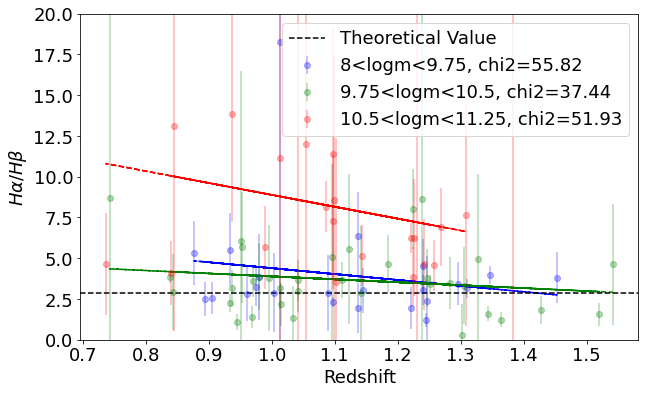

In [ ]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

def radius_average(r_min, r_max):
    avg_balmer_m = []
    avg_balmer_m_err = []
    redshifts = []
    for mass_bin in range(1, len(bins_m)):
        avg_balmer = []
        avg_balmer_err = []
        redshift = []
        for obj in obj_lis_sel[obj_lis_sel['bin_m'] == mass_bin]:
            path = f"data_extracted/{file_name(obj, prefix='extracted')}"
            with fits.open(path) as hdu:
                r, ha_r, ha_r_err, hb_r, hb_r_err, balmer, balmer_err, E_ba, A_a = np.vstack(find_data('RAD_PROFILE_ELLIP__CONV_PACK', hdu)[1].data).transpose()
                r = r / obj['re']
                mask = (r >= r_min) & (r <= r_max)
                avg_balmer.append(np.mean(balmer[mask]))
                avg_balmer_err.append((np.std(balmer[mask])**2 + np.mean(balmer_err[mask])**2)**0.5)
                redshift.append(obj['z_MAP'])
        
        avg_balmer_m.append(avg_balmer)
        avg_balmer_m_err.append(avg_balmer_err)
        redshifts.append(redshift)
    return avg_balmer_m, avg_balmer_m_err, redshifts

def plot_radius_average(r_min, r_max):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['blue', 'green', 'red']
    
    avg_balmer_m, avg_balmer_m_err, redshifts = radius_average(r_min, r_max)
    
    for mass_bin in range(1, len(bins_m)):
        x = np.array(redshifts[mass_bin-1])
        y = np.array(avg_balmer_m[mass_bin-1])
        yerr = np.array(avg_balmer_m_err[mass_bin-1])
        
        # Remove NaN and infinite values
        mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(yerr)
        mask_for_fit = np.isfinite(x) & np.isfinite(y) & (y<30); x_for_plot = x[mask]; y_for_plot = y[mask]; yerr_for_plot = yerr[mask]
        x = x[mask_for_fit]
        y = y[mask_for_fit]
        yerr = yerr[mask_for_fit]
        
        if len(x) > 1:  # Ensure there are enough points to fit
            try:
                # Fit a linear line
                p = np.polyfit(x, y, 1)
                y_fit = np.polyval(p, x)
                
                # Calculate chi2
                chi2, p_value = chisquare(f_obs=y, f_exp=y_fit)
                
                # Plot data points with error bars
                ax.errorbar(x_for_plot, y_for_plot, yerr=yerr_for_plot, fmt='o', alpha=0.3, color=colors[mass_bin-1], label=f'{bin_label_m[mass_bin-1]}, chi2={chi2:.2f}')
                
                # Plot the fitted line
                ax.plot(x, y_fit, color=colors[mass_bin-1], linestyle='--')
            except np.linalg.LinAlgError:
                print(f"LinAlgError: SVD did not converge for mass bin {mass_bin}")
    
    ax.axhline(2.86, linestyle='--', color='black', label='Theoretical Value')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$H\alpha / H\beta$')
    ax.legend()
    plt.ylim(0, 20)
    plt.show()

# Example usage
plot_radius_average(0, 0.2)
